<img src="images/ML_Nova_Header.png">

<img src="images/semma.png">


# <font color='#BFD72F'>Contents</font> <a class="anchor" id="toc"></a>

* [1. Import the data](#import)
    * [1.1. Impot needed libraries](#2nd-bullet)
* [2. Explore the data](#explore)
* [3. Prepare the data](#prepare)
    * [3.1. Explore the data](#dataexploration)
    * [3.2. Pre-process the data](#datapreprocess)
    * [3.3. Feature Engineering](#feateng)
    * [3.4. Feature Selection](#featselection)
* [4. Model Assessment](#assess)
    * [4.1. Split with Holdout Method](#holdout)
    * [4.2. K-fold cross validation Method](#k-fold)
    * [4.3. Assess using Logistic Regression](#lregression)
    * [4.4. Assess using Random Forest Classifier](#rforrest)
    * [4.5. Assess using KNN Classifier](#KNNClassifier)
    * [4.6. Assess using Decision Tree Classifier](#DTClassifier)
    * [4.7. Assess using Neural Network (MLP) Classifier](#MLPClassifier)
    * [4.8. Assess using Gradient Boosting Classifier](#GBClassifier)
    * [4.8. Conclusions](#Comparison)
    
* [5. Predictions](#pred)


# 1. Import the data <a class="anchor" id="import"></a>
[Back to Contents](#toc)

<a class="anchor" id="2nd-bullet">

### <font color = '#cc9900'> 1.1. Import the needed libraries>
[Back to Contents](#toc) 

__`Step 1`__ Import all the needed packages.

In [1]:
import pandas as pd
import numpy as np

#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For new variable Age creation
from datetime import date

# Feature Selection
from sklearn.feature_selection import RFE
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Scaling
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

#Classification/Score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score
from sklearn.metrics import classification_report


# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Model Assessment
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

#To Export Dataset
import os

#Warnings
import warnings
warnings.filterwarnings('ignore')

__`Step 2`__ Import the train dataset.

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,...,5,3,4,5,5,5,5,1,5,2
2,3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,...,1,4,4,3,3,2,3,2,3,1
3,4,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,...,4,4,5,4,4,4,4,4,4,3
4,5,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,...,5,5,5,5,5,3,4,1,3,5


__GOAL__: Understand the probability of customers churn, by studying their behaviour/satisfaction.

`Cust ID` Customer’s identification number<br>
`Name` Customer’s name <br>
`Year Birth` Customer’s birth year <br>
`Longevity` Whether the customer registered more than 1 year ago or not (yes or no)<br>
`Churn` Whether the customer churned or not (churn - 1; or nochurn - 0) <br>
`TypeTravel` Customer’s reason for travelling (business or leisure) <br>
`RoomType` Type of room reserved <br>
`RewardPoints` Customer’s rewarding point for loyalty <br>
`Comfort` Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`ReceptionSchedule` Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`FoodDrink` Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`Location` Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`Wifi` Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`Amenities` Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`Staff` Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`OnlineBooking` Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`PriceQuality` Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`RoomSpace` Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`CheckOut` Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`CheckIn` Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`Cleanliness` Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`BarService` Satisfaction level of customer regarding comfort of the room (0 to 5) <br>



# 2. Explore the data <a class="anchor" id="explore"></a>
[Back to Contents](#toc)

__`Step 1`__ Explore and get insights from the data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_ID            15589 non-null  int64  
 1   Churn              15589 non-null  object 
 2   Name               15589 non-null  object 
 3   Longevity          15589 non-null  object 
 4   Year_Birth         15394 non-null  float64
 5   TypeTravel         15589 non-null  object 
 6   RoomType           15589 non-null  object 
 7   RewardPoints       15589 non-null  int64  
 8   Comfort            15589 non-null  int64  
 9   ReceptionSchedule  15589 non-null  int64  
 10  FoodDrink          15589 non-null  int64  
 11  Location           15589 non-null  int64  
 12  Wifi               15589 non-null  int64  
 13  Amenities          15589 non-null  int64  
 14  Staff              15589 non-null  int64  
 15  OnlineBooking      15589 non-null  int64  
 16  PriceQuality       155

Data Types for Independent Variables:

- __Continuous__ - Year_Birth, RewardPoints
- __Categorical__ - Name, RoomType
- __Binary__ - Longevity, TypeTravel
- __Ordinal__ - Comfort, ReceptionSchedule, FoodDrink, Location, Wifi, Amenities, Staff, OnlineBooking, PriceQuality, RoomSpace, CheckOut, Checkin, Cleanliness, BarService

Missing values:
- Year Birth (continuous)



# 3. Prepare the data <a class="anchor" id="prepare"></a>
[Back to Contents](#toc)

<a class="anchor" id="dataexploration">

### <font color = '#cc9900'> 3.1. Explore Data </font>
    
[Back to Contents](#toc) 

__`Step 1`__ Basic data exploration

In [4]:
df.shape

(15589, 22)

In [5]:
df.columns

Index(['Cust_ID', 'Churn', 'Name', 'Longevity', 'Year_Birth', 'TypeTravel',
       'RoomType', 'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink',
       'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking',
       'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness',
       'BarService'],
      dtype='object')

__`Step 2`__ Check for duplicates.

In [6]:
df[df.duplicated(keep = False)]

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService


There are no duplicates, so no treatment is needed.

__`Step 3`__ Data Exploration.

__`3.1`__ __Statistical Exploration__

* Numerical Variables

In [7]:
df.describe()

,Cust_ID,Year_Birth,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
count,15589.000000,15394.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000
mean,7795.000000,1981.706444,5022.593816,2.841619,2.997242,2.844570,2.986016,3.245109,3.374816,3.506383,3.454231,3.459683,3.470845,3.700558,3.327282,3.692347,3.347360
std,4500.301008,15.179042,1027.962379,1.388624,1.518994,1.436948,1.299438,1.327026,1.352417,1.319565,1.310343,1.268130,1.293873,1.158644,1.266872,1.154437,1.300452
min,1.000000,1936.000000,409.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,3898.000000,1970.000000,4445.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,7795.000000,1981.000000,5088.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,11692.000000,1994.000000,5649.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000
max,15589.000000,2014.000000,6950.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**Identified Issues**:
  * Wifi column contains evaluations with value 6, and it should be between 0-5
  * Year_Birth has 195 missing values (as already noticed above)

* Categorical Variables

In [8]:
df.describe(include = ['O'])

,Churn,Name,Longevity,TypeTravel,RoomType
count,15589,15589,15589,15589,15589
unique,2,14227,3,2,3
top,nochurn,Mr. Michael Smith,yes,business,single
freq,8477,9,12548,10756,7442


**Identified Issues**:
  * Name variable has a lot of different attributes which might indicate that will not be useful in our analysis
  * Longevity has 3 possible variables when we were expecting two (yes/no)

__`3.2`__ __Check the levels/possible values in the variables "Wifi","Longevity", "TypeTravel" and "RoomType"__

In [9]:
df['Wifi'].value_counts()

4    3704
5    3446
3    3348
2    3245
1    1792
6      36
0      18
Name: Wifi, dtype: int64

In [10]:
df['Longevity'].value_counts()

yes    12548
no      2874
y        167
Name: Longevity, dtype: int64

In [11]:
df['TypeTravel'].value_counts()

business    10756
leisure      4833
Name: TypeTravel, dtype: int64

In [12]:
df['RoomType'].value_counts()

single    7442
double    7021
suite     1126
Name: RoomType, dtype: int64

__`Step 4`__ Visual Exploration.

__Numerical Variables__

__`4.1`__ Create a `histogram` for the variable Year Birth to gain a better insight of its behaviour

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

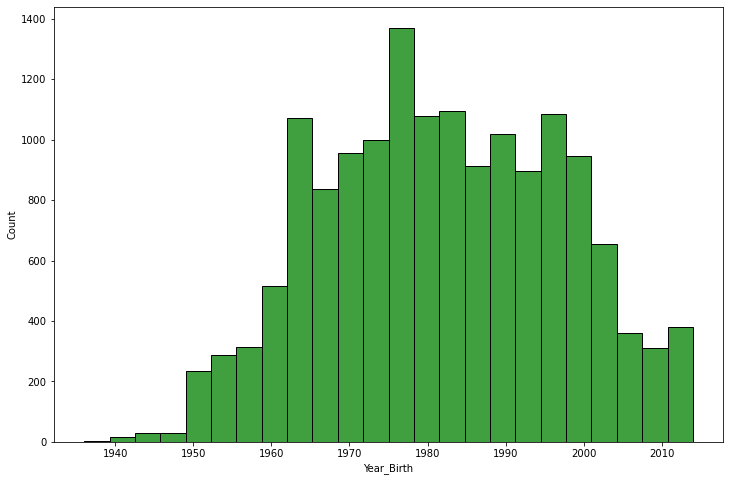

In [13]:
figure = plt.figure(figsize=(12,8))
sns.histplot(df['Year_Birth'], color="g", bins = 24)

__`4.2`__ Create a `scatterplot` where the x axis represent the RewardPoints and the y axis define the Year of Birth of the customers

<AxesSubplot:xlabel='RewardPoints', ylabel='Year_Birth'>

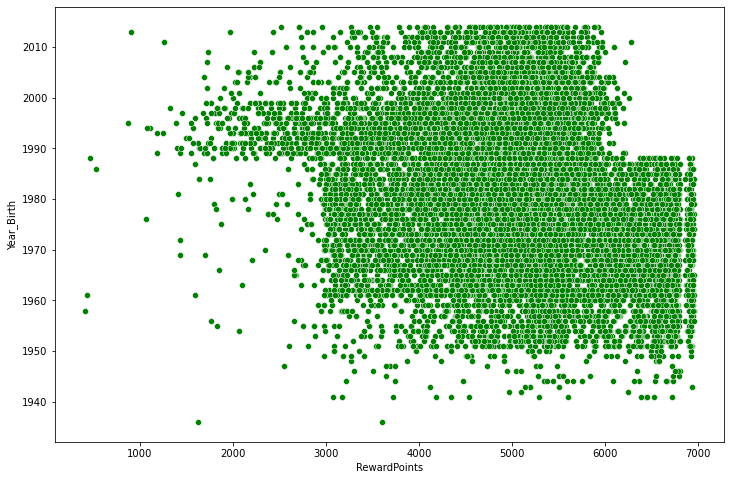

In [14]:
figure = plt.figure(figsize=(12,8))
sns.scatterplot(x = 'RewardPoints', y= 'Year_Birth',color="g", data = df)

__Categorical Variables__

<AxesSubplot:xlabel='BarService', ylabel='Count'>

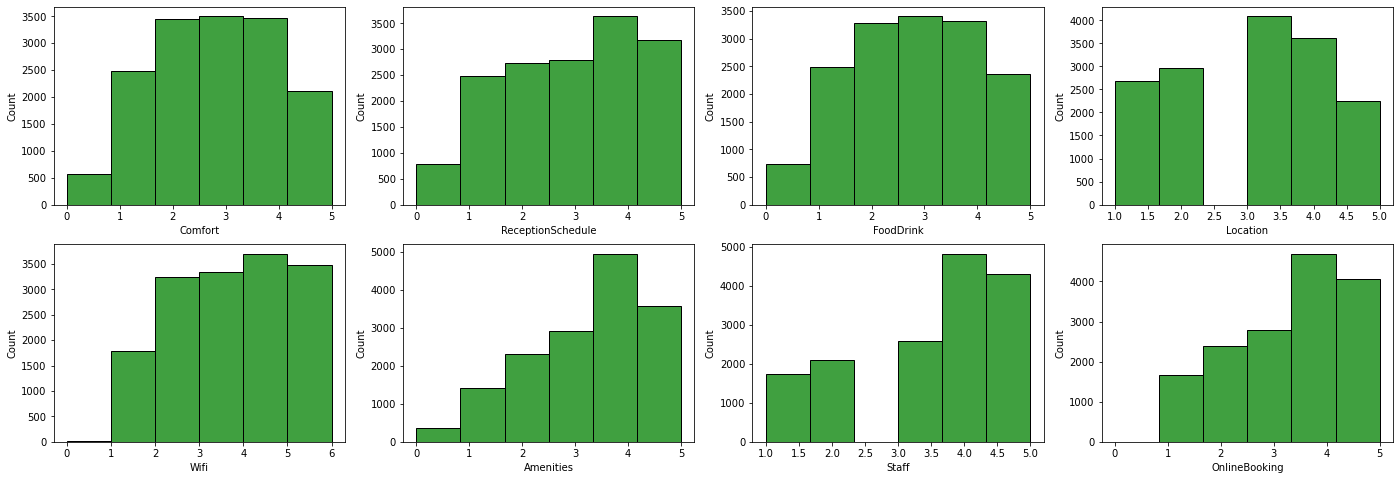

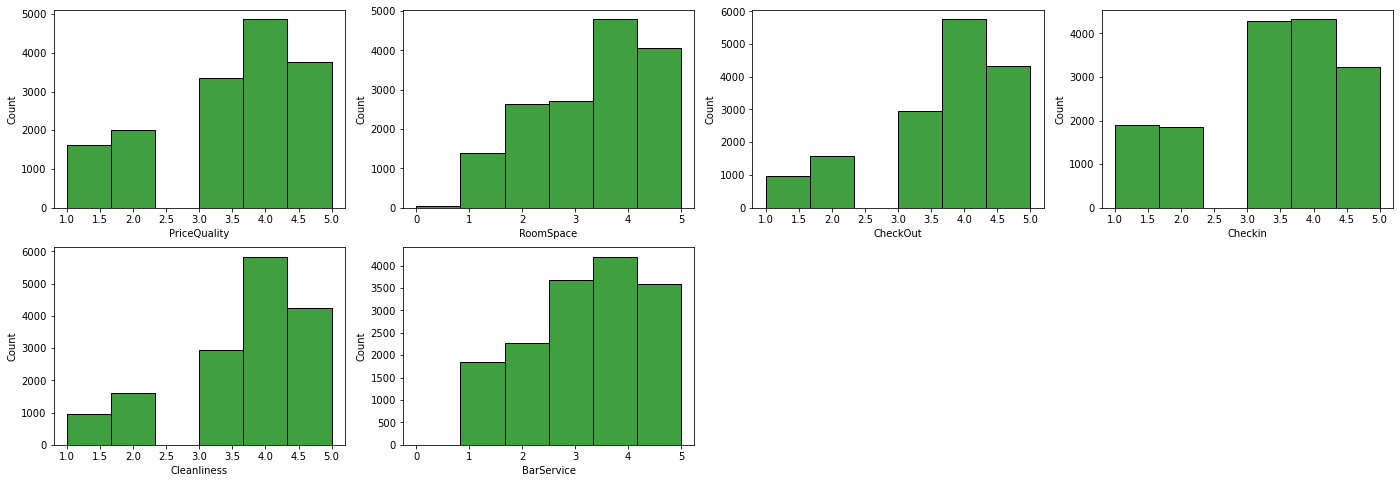

In [15]:
figure = plt.figure(figsize=(24,8))
ax = plt.subplot(241)
sns.histplot(df['Comfort'], color="g", bins = 6)
ax = plt.subplot(242)
sns.histplot(df['ReceptionSchedule'], color="g", bins = 6)
ax = plt.subplot(243)
sns.histplot(df['FoodDrink'], color="g", bins = 6)
ax = plt.subplot(244)
sns.histplot(df['Location'], color="g", bins = 6)
ax = plt.subplot(245)
sns.histplot(df['Wifi'], color="g", bins = 6)
ax = plt.subplot(246)
sns.histplot(df['Amenities'], color="g", bins = 6)
ax = plt.subplot(247)
sns.histplot(df['Staff'], color="g", bins = 6)
ax = plt.subplot(248)
sns.histplot(df['OnlineBooking'], color="g", bins = 6)

figure = plt.figure(figsize=(24,8))
ax = plt.subplot(241)
sns.histplot(df['PriceQuality'], color="g", bins = 6)
ax = plt.subplot(242)
sns.histplot(df['RoomSpace'], color="g", bins = 6)
ax = plt.subplot(243)
sns.histplot(df['CheckOut'], color="g", bins = 6)
ax = plt.subplot(244)
sns.histplot(df['Checkin'], color="g", bins = 6)       
ax = plt.subplot(245)
sns.histplot(df['Cleanliness'], color="g", bins = 6)            
ax = plt.subplot(246)
sns.histplot(df['BarService'], color="g", bins = 6)          

More `in depth exploration`

In [16]:
df.groupby('Year_Birth')['RewardPoints'].mean()

Year_Birth
1936.0    2610.500000
1941.0    5108.307692
1942.0    5431.000000
1943.0    5344.833333
1944.0    5618.500000
             ...     
2010.0    4806.688679
2011.0    4968.072917
2012.0    4709.642857
2013.0    4699.405941
2014.0    4824.547619
Name: RewardPoints, Length: 75, dtype: float64

In [17]:
df.query('TypeTravel == "business"').groupby('RoomType')['RewardPoints'].median()

RoomType
double    5165.5
single    4872.0
suite     5217.0
Name: RewardPoints, dtype: float64

<a class="anchor" id="datapreprocess">

### <font color = '#cc9900'> 3.2. Pre-Process the Data </font>

[Back to Contents](#toc) 

__`Step 5`__ Define Cust_ID as Index

In [18]:
df.set_index('Cust_ID', inplace = True)

__`Step 6`__ Data Cleaning

* Checking for `Outliers`

<AxesSubplot:xlabel='RewardPoints'>

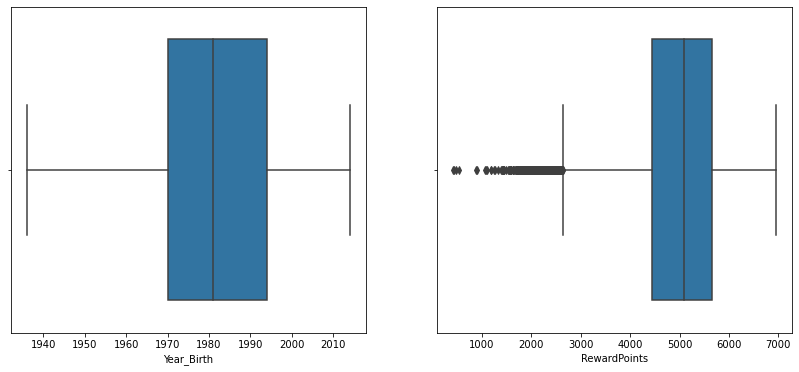

In [19]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = axes[0], data = df, x = 'Year_Birth')
sns.boxplot(ax = axes[1], data = df, x = 'RewardPoints')

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

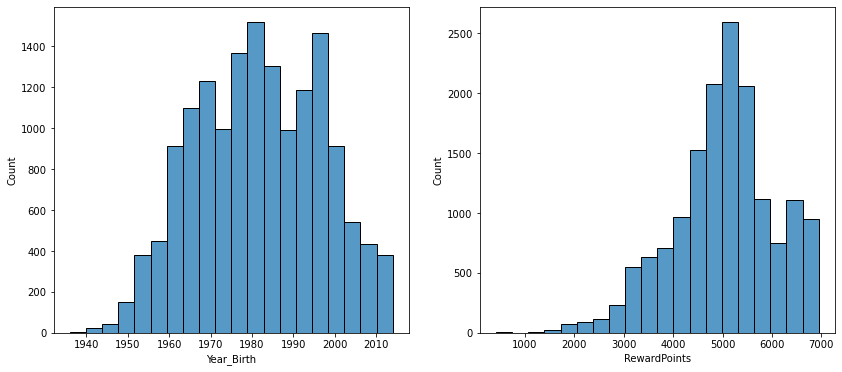

In [20]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.histplot(ax = axes[0], data = df, x = 'Year_Birth', bins = 20)
sns.histplot(ax = axes[1], data = df, x = 'RewardPoints', bins = 20)

* From the figures above, we conclude that RewardPoints < 1000 may represent outliers in our dataset

Check the amount of reviews with RewardPoints < 1000

In [21]:
df[df['RewardPoints'] < 1000]

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,,
5780,nochurn,Ms. Kimberly Patterson,yes,1958.0,leisure,single,409,0,5,0,...,0,5,1,3,2,4,3,1,5,1
8159,churn,Mr. Alexander Wood,no,2013.0,business,double,901,2,2,2,...,2,4,4,3,4,3,4,4,2,4
9677,churn,Mr. Cody Silva,yes,1986.0,leisure,double,530,1,1,1,...,1,3,3,1,2,2,2,3,2,3
11435,nochurn,Ms. Hannah Jones,yes,1988.0,business,single,463,1,1,1,...,4,4,4,4,1,4,5,4,3,4
12152,nochurn,Mr. Stanley Miller,yes,1961.0,business,single,429,2,5,2,...,3,3,3,5,3,4,4,3,3,3
14529,nochurn,Ms. Kim Miller,yes,1995.0,business,single,874,2,2,2,...,4,4,4,3,5,4,4,4,5,4


* The total amount of reviews that verify this condition - 6 customer reviews - are << 3% of our dataset. 

Remove the observations where RewardPoints < 1000

In [22]:
df = df.drop(df[df['RewardPoints'] < 1000].index)

* Dealing with the `missing values`

In our dataset, and as was previously mentioned, the only feature with missing values is __Year_Birth__ with 195 missing values. It represents a small portion of our dataset (about 1 %) so the dropping of this observations was an option. However, a different approach was taken, considering different options to fill these missing values.

In [23]:
df.isna().sum()

Churn                  0
Name                   0
Longevity              0
Year_Birth           195
TypeTravel             0
RoomType               0
RewardPoints           0
Comfort                0
ReceptionSchedule      0
FoodDrink              0
Location               0
Wifi                   0
Amenities              0
Staff                  0
OnlineBooking          0
PriceQuality           0
RoomSpace              0
CheckOut               0
Checkin                0
Cleanliness            0
BarService             0
dtype: int64

Therefore, the final solution for filling the missing values (that can be used for any case of missing value..) was by using the __KNN Imputer__.

### <font color='#0000FF'> K-Nearest Neighbor (KNN) Imputer
A usually good approach to missing data imputation is to use a model do predict the missing values. An algorithm that has proven to be effective in this purpose, is the k-nearest neighbor.

A simple description of the k-Nearest Neighbours (kNN) is that it identifies the neighboring points through a measure of distance and the missing values can be estimated using completed values of neighboring observations. 
Basically, the idea in kNN is to identify ‘k’ samples in the dataset that are similar or close in the space. Then we use these ‘k’ samples to estimate the value of the missing data points. Each sample’s missing values are imputed using the mean value of the ‘k’-neighbors found in the dataset.

The main parameters of the KNN algorithm are as follows: 

`missing_values` Weight function used in prediction (default = np.nan) <br>
`n_neighbors` Weight function used in prediction (default = 5) <br>
`weights` Weight function used in prediction (default = 'uniform') <br>
`metric` Distance metric for searching neighbors (default = 'nan_euclidean') <br>


Below, we create a funcion that will accept three input parameters:
- __df_train__: train dataset with the missing values
- __df_val__:  val dataset with missing values
- __yes_name__: boolean parameter, True if customer name still in dataset
- __yes_dummies__: boolean parameter, True if dataset already dummies
- __missing_cols__: features with missing data
    
As we are splitting our dataset into train a validation subsets further in this project, this function to fill missing values will be executed then. 

In [24]:
def knn_impute(df_train,df_val, yes_name,yes_dummies, missing_cols):
    
    df_train_noid = df_train.reset_index()
    df_val_noid = df_val.reset_index()
    # before creating our dummy dataframe
    if (yes_name == True) and (yes_dummies == False):
        df_train_noname = df_train_noid.copy()
        df_train_noname = df_train_noname.drop('Name', axis = 1)
        df_train_dummies = pd.get_dummies(df_train_noname, drop_first = True)
        df_val_noname = df_val_noid.copy()
        df_val_noname = df_val_noname.drop('Name', axis = 1)
        df_val_dummies = pd.get_dummies(df_val_noname, drop_first = True)
    elif (yes_name == False) and (yes_dummies == False):
        df_val_noname = df_val_noid.copy()
        df_val_dummies = pd.get_dummies(df_val_noname, drop_first = True)
        df_train_noname = df_train_noid.copy()
        df_train_dummies = pd.get_dummies(df_train_noname, drop_first = True)
    else: 
        df_val_dummies = df_val_noid.copy()
        df_train_dummies = df_train_noid.copy()
    
    imputer = KNNImputer(n_neighbors=10) # defining the number of neighbours
    imputer.fit(df_train_dummies)     # fit KNN Imputer on our train data set

    # apply to our dataset the fitted KNN inputer, and fill the missing values in train data
    Xnew_train = imputer.transform(df_train_dummies) 
    Xnew_train = pd.DataFrame(Xnew_train,columns=df_train_dummies.columns) # Transform Xnew train in Pandas DataFrame
    Xnew_train.set_index('Cust_ID', inplace = True)
    
    # apply to our dataset the fitted KNN inputer, and fill the missing values in val/test data    
    Xnew_val = imputer.transform(df_val_dummies)
    Xnew_val = pd.DataFrame(Xnew_val,columns=df_val_dummies.columns) # Transform Xnew val in Pandas DataFrame
    Xnew_val.set_index('Cust_ID', inplace = True)

    # Replace the transformed column to our complete df datasets
    df_train[missing_cols] = Xnew_train[missing_cols]
    df_val[missing_cols] = Xnew_val[missing_cols]
    
    return df_train, df_val

<a class="anchor" id="feateng">

### <font color = '#cc9900'> 3.3. Feature Engineering </font>

[Back to Contents](#toc) 

__`Step 7`__ Create new variables `Feature Engineering`

__Age:__

In [25]:
df['Age'] = date.today().year - df['Year_Birth']

__Gender:__

In [26]:
df['Gender'] = np.where(df['Name'].str[:3] == 'Mr.','M','F')

In [27]:
df.head()

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age,Gender
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,3,3,3,4,3,4,48.0,F
2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,4,5,5,5,5,1,5,2,57.0,M
3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,4,3,3,2,3,2,3,1,49.0,M
4,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,5,4,4,4,4,4,4,3,29.0,F
5,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,3,4,1,3,5,33.0,M


__`Step 8`__ Identify `missclassifications`

- replace Longevity observation with value 'y' by 'yes', assuming these represent some typing error. 
- drop Wifi observations with value 6 (total of 36 observations)

In [28]:
df['Longevity'] = df['Longevity'].replace('y','yes')
df['Longevity'].value_counts()

yes    12710
no      2873
Name: Longevity, dtype: int64

In [29]:
df = df.drop(df[df['Wifi'] == 6].index)
df['Wifi'].value_counts()

4    3702
5    3446
3    3347
2    3244
1    1791
0      17
Name: Wifi, dtype: int64

__`Step 13`__  `Data Reduction:`  Drop redundant variables `avoid multicolinearity`

In [30]:
df.drop('Year_Birth', axis = 1, inplace = True) 

__`Step 14`__  Reorganize dataframe columns

In [31]:
column_names = ['Name','Longevity', 'TypeTravel', 'RoomType', 'Age', 'Gender', 'RewardPoints',
       'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
       'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
       'CheckOut', 'Checkin', 'Cleanliness', 'BarService','Churn']
df = df.reindex(columns=column_names)

__`Step 15`__  Transform the target (Churn) feature into binary (0 - nochurn, 1 - churn)

In [32]:
df['Churn'] = np.where((df['Churn']=='churn'),1,0)
df

,Name,Longevity,TypeTravel,RoomType,Age,Gender,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Churn
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,Ms. Nicole Clarke,yes,business,single,48.0,F,4907,3,4,1,...,3,4,3,3,3,3,4,3,4,1
2,Mr. Jesse Scott,yes,business,single,57.0,M,6724,1,1,1,...,3,4,5,5,5,5,1,5,2,0
3,Mr. Christopher Carter,yes,business,single,49.0,M,4365,3,3,3,...,4,4,3,3,2,3,2,3,1,1
4,Ms. Jennifer Morgan,yes,leisure,double,29.0,F,3849,1,1,1,...,4,5,4,4,4,4,4,4,3,0
5,Mr. Michael White,yes,business,single,33.0,M,5376,2,2,3,...,5,5,5,5,3,4,1,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,Ms. Wendy Roberts,no,business,double,34.0,F,4968,2,0,2,...,2,4,3,4,5,1,3,4,3,1
15586,Ms. Sonya Smith,no,business,double,22.0,F,4970,3,3,3,...,3,5,5,3,1,3,4,4,5,1
15587,Mr. Maxwell Wright,yes,business,single,58.0,M,4046,1,1,1,...,4,5,4,4,4,4,5,4,4,0


<a class="anchor" id="featselection">

### <font color = '#cc9900'> 3.4. Feature Selection </font>

[Back to Contents](#toc)

__`Step 16`__ - Define the independent variables as __X__ and the dependent variable as __y__. 

In [33]:
X = df.drop(columns=['Churn'])
y = df['Churn']

__`Step 17`__ Separate the numerical from the categorical variables. 

In [34]:
num_vars = ['Age', 'RewardPoints','Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']
cat_vars = ['Name','Longevity', 'TypeTravel', 'RoomType','Gender']

__`Step 18`__ Create a function that selects the best features for each split of a `StratifiedKFold.`

In [35]:
def select_best_features(X, y):
    skf = StratifiedKFold(n_splits = 5)
    counter = 0
    for train_index, val_index in skf.split(X, y):
        counter +=1
        print('')
        print('--------------------------------------------------------')
        print('SPLIT ', counter)
        print('--------------------------------------------------------')
        print('')
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # using knn imputer function to fill missing values of Age.
        X_train, X_val = knn_impute(X_train,X_val, True, False, 'Age')

        X_train_dum = pd.get_dummies(X_train.drop('Name', axis = 1), drop_first = True)
        X_val_dum = pd.get_dummies(X_val.drop('Name', axis = 1), drop_first = True)
        
        # get all numerical variables
        X_train_num = X_train[num_vars]
        X_val_num = X_val[num_vars]
        
        # get all categorical variables
        X_train_cat = X_train[cat_vars]
        X_val_cat = X_val[cat_vars]
        
        # Apply scaling to numerical data
        scaler = MinMaxScaler().fit(X_train_num)
        X_train_scaled = pd.DataFrame(scaler.transform(X_train_num), columns = X_train_num.columns, index = X_train_num.index,) # MinMaxScaler in the training data
        X_val_scaled = pd.DataFrame(scaler.transform(X_val_num), columns = X_val_num.columns, index = X_val.index)
    
        #no of features
        nof_list_lr=np.arange(1,16) 
        nof_list_rf=np.arange(15,21) # after test and trial, it was concluded that the optimum number is somewhere between 15 and 21. 
        high_score_lr=0
        high_score_rf=0
        
        #Variable to store the optimum features
        nof_lr=0
        nof_rf=0
        score_lr_list =[]
        score_rf_list=[]
        for n in range(len(nof_list_lr)):
            model_lr = LogisticRegression()
            rfe_lr = RFE(model_lr, n_features_to_select=nof_list_lr[n])
            X_train_rfelr = rfe_lr.fit_transform(X_train_scaled,y_train)
            X_val_rfelr = rfe_lr.transform(X_val_scaled)
            model_lr.fit(X_train_rfelr,y_train)
            score_lr = model_lr.score(X_val_rfelr,y_val)
            score_lr_list.append(score_lr)
    
            if(score_lr>high_score_lr):
                high_score_lr = score_lr
                nof_lr = nof_list_lr[n]
        
        # Check which features to use using RFE
        print('')
        print('------------ RFE - Logistic Regression ------------')
        print("Optimum number of features: %d" %nof_lr)
        print("Score with %d features: %f" % (nof_lr, high_score_lr))
        model = LogisticRegression()
        rfe = RFE(estimator = model, n_features_to_select = nof_lr) # features to select
        X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
        print(selected_features)     
        
        # Check which features to use using Chi-Square
        print('')
        print('----------------- CHI-SQUARE ----------------------')
        def TestIndependence(X,y,var,alpha=0.05):        
            dfObserved = pd.crosstab(y,X) 
            chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
            dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
            if p<alpha:
                result="{0} is IMPORTANT for Prediction".format(var)
            else:
                result="{0} is NOT important for Prediction. (Discard {0} from model)".format(var)
            print(result)
        
        for var in X_train_cat:
            TestIndependence(X_train_cat[var],y_train, var)


        for n in range(len(nof_list_rf)):
            model_rf = RandomForestClassifier()
            rfe_rf = RFE(model_rf, n_features_to_select=nof_list_rf[n])
            X_train_rferf = rfe_rf.fit_transform(X_train_dum,y_train)
            X_val_rferf = rfe_rf.transform(X_val_dum)
            model_rf.fit(X_train_rferf,y_train)
            score_rf = model_rf.score(X_val_rferf,y_val)
            score_rf_list.append(score_rf)
            
            if(score_rf>high_score_rf):
                high_score_rf = score_rf
                nof_rf = nof_list_rf[n]
        
        print('')
        print('------------ RFE - Random Forest Classifier ------------')
        print("Optimum number of features: %d" %nof_rf)
        print("Score with %d features: %f" % (nof_rf, high_score_rf))
        model_rf = RandomForestClassifier(max_depth = 5)
        rfe = RFE(estimator = model_rf, n_features_to_select = nof_rf) # features to select
        X_rfe = rfe.fit_transform(X = X_train_dum, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_dum.columns)
        print(selected_features)

In [36]:
select_best_features(X, y)


--------------------------------------------------------
SPLIT  1
--------------------------------------------------------


------------ RFE - Logistic Regression ------------
Optimum number of features: 11
Score with 11 features: 0.803537
Age                   True
RewardPoints         False
Comfort               True
ReceptionSchedule     True
FoodDrink             True
Location             False
Wifi                  True
Amenities             True
Staff                 True
OnlineBooking         True
PriceQuality          True
RoomSpace             True
CheckOut             False
Checkin               True
Cleanliness          False
BarService           False
dtype: bool

----------------- CHI-SQUARE ----------------------
Name is NOT important for Prediction. (Discard Name from model)
Longevity is IMPORTANT for Prediction
TypeTravel is IMPORTANT for Prediction
RoomType is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction

------------ RFE - Random Forest Classifier ---

#### Final insights from the applied feature selection models

|   | Chi-Square | RFE Logistic Regression | RFE - Random Forest | Final Decision | 
| --- | --- | --- | --- | --- |
| Name | Discard | - | - | Discard from model | 
| Longevity | Keep | - | Keep | Keep in model |
| TypeTravel | Keep | - | Keep | Keep in model |
| RoomType | Keep | - | Keep | Keep in model |
| Gender | Kepp | - | Keep | Keep in model |
| RewardPoints | - | Discard | Discard | Discard from model | 
| Age | - | Keep? | Keep? | Try with and without | 
| Comfort | - | Keep | Keep | Keep in model |
| Reception Schedule | - | Keep | Keep | Keep in model | 
| FoodDrinks | - | Keep | Keep | Keep in model | 
| Location | - | Discard? | Discard? |  Try with and without |
| Wifi | - | Keep? | Keep | Try with and without | 
| Amenities | - | Keep | Keep | Keep in model | 
| Staff | - | Keep | Keep | Keep in model | 
| OnlineBooking | - | Keep | Keep | Keep in model |
| PriceQuality | - | Keep | Keep | Keep in model | 
| RoomSpace | - | Keep | Keep | Keep in model | 
| CheckOut | - | Discard | Keep | Try with and without | 
| Checkin | - | Keep | Keep | Keep in model| 
| Cleanliness | - | Discard | Keep | Try with and without | 
| BarService | - | Discard | Keep | Try with and without | 
| RoomType_suite (dummy) | - | - | Discard | Discard from model | 


__`Step 19`__ Discard the less important variables

In [37]:
X.drop('Name', axis = 1, inplace = True) 
X.drop('RewardPoints', axis = 1, inplace = True) 

<a class="anchor" id="assess">

### <font color = '#cc9900'> 4. Model and Assessment </font>

[Back to Contents](#toc)

<a id="holdout"></a>

#### <font color = '#cc9900'> 4.1. Split with Hold-Out Method </font>

[Back to Contents](#toc)

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=y
                                                   )
print('train:{}% | validation:{}% '.format(round(len(y_train)/len(y),2),
                                            round(len(y_val)/len(y),2)
                                                    ))


# using knn imputer function to fill missing values of Age.
X_train, X_val = knn_impute(X_train,X_val, False, False, 'Age')

X_train_dummy = pd.get_dummies(X_train, drop_first = True)
X_val_dummy = pd.get_dummies(X_val, drop_first = True)

# Drop the features RommType_suite from X_train and X_val dummies.
X_train_dummy.drop('RoomType_suite', axis = 1, inplace = True)
X_val_dummy.drop('RoomType_suite', axis = 1, inplace = True)


train:0.8% | validation:0.2% 


<a id="k-fold"></a>

#### <font color = '#cc9900'> 4.2. K-fold Cross Validation Method </font>

[Back to Contents](#toc)

In [39]:
def avg_score(method, mod, X, y):
    score_train = []
    score_val = []
    
    for train_index, val_index in method.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        if 'Age' in X_train:
            # using knn imputer function to fill missing values of Age.
            X_train, X_val = knn_impute(X_train,X_val, False,True, 'Age')

        model = mod.fit(X_train, y_train)
        value_train = model.score(X_train,y_train)
        print('Train:', value_train)
        value_val = model.score(X_val, y_val)
        print('Validation:', value_val)
        print('')
        score_train.append(value_train)
        score_val.append(value_val)

    print('-------------------------------')
    print('Average Train:' +  str(round(np.mean(score_train),4)) + '+/-' + str(round(np.std(score_train),4)))
    print('Average Validation:' +  str(round(np.mean(score_val),4)) + '+/-' + str(round(np.std(score_val),4)))

<a id="lregression"></a>

#### <font color = '#cc9900'> 4.3. Assess using Logistic Regression </font>

[Back to Contents](#toc)

Logistic regression is a type of supervised machine learning used to predict the probability of a target variable. It is used to estimate the relationship between a dependent (target) variable and one or more independent variables. The output of the dependent variable is represented in discrete values such as 0 and 1.

Below is the function for logistic regression:

<img src="images/lr1.png" width="150px">

- E is log base
- X is the numerical value that needs to be transformed.

<img src="images/lr2.png" width="500px">

If we feed an output value to the sigmoid function, it will return the probability of the outcome between 0 and 1. If the value is below 0.5, then the output is return as No/Fail (above example). If the value is above 0.5, then the output is returned as Yes/Pass.

Assumptions of Logistic regression:
- Independent variables show a linear relationship with the log of output variables.
- Non-Collinearity between independent variables. That is, independent variables are independent of each other.
- Output variable is binary.


Parameters:

`penalty` Specify the norm of the penalty (default = 'l2')  <br>
`tol`  Tolerance for stopping criteria (default = 1e-4) <br>
`C` Inverse of regularization strength; must be a positive float (default = 1) <br>
`class_weight` Weights associated with classes in the form (default = None) <br>
`solver` Algorithm to use in the optimization problem (default = lbfgs') <br>
`max_iter` Maximum number of iterations taken for the solvers to converge (default = 'auto') <br>

Development of the prediction model divided into two main phases: 
1. train and optimize (using gridsearchcv) the model with current best feature selection
    - obtain the best parameters for the model
    - check validation and test performance of the model
2. consider different feature selections to check if there is any improvement
    - obtain the best features for the model
    - train the model
    - check validation and test performance of the model 

__`Step 1`__ Copy train and validation sets and scale both sets

In [40]:
Xlr_train_dummy = X_train_dummy.copy()
Xlr_val_dummy = X_val_dummy.copy()
        
# Apply scaling to numerical data
scaler = MinMaxScaler().fit(Xlr_train_dummy)
Xlr_train_scaled = pd.DataFrame(scaler.transform(Xlr_train_dummy), columns = Xlr_train_dummy.columns, index = Xlr_train_dummy.index)
Xlr_val_scaled = pd.DataFrame(scaler.transform(Xlr_val_dummy), columns = Xlr_val_dummy.columns, index = Xlr_val_dummy.index)

__`Step 2`__ Define Logistic Regression model

In [41]:
log_model = LogisticRegression()

__`Step 3`__ - Define a dictionary named as __parameter_space__ and define the following options to be considered during modelling.

In [42]:
parameter_space = {
    'penalty': ['none', 'l2','l1'],
    'tol': [0.0001, 0.01, 0.1],
    'C':[0, 0.8, 1.0, 10, 20],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
    'class_weight': ['none', 'balanced'],
    'max_iter': [30, 50, 75, 100] 
}

__`Step 4`__ - Create an instance of GridSearchCV named as __clflr__ and pass as parameters the __model__ and the __parameter_space__

In [43]:
clflr = GridSearchCV(log_model, parameter_space)

__`Step 5`__ - Fit your Grid Search to __Xlr_train__ and __y_train__

In [44]:
clflr.fit(Xlr_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0, 0.8, 1.0, 10, 20],
                         'class_weight': ['none', 'balanced'],
                         'max_iter': [30, 50, 75, 100],
                         'penalty': ['none', 'l2', 'l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.01, 0.1]})

__`Step 6`__ - Call the attribute __best_params___ to check which is the best combination of parameters. Create a final model with those parameters by calling the attribute __best_estimator___

In [45]:
clflr.best_params_

{'C': 0.8,
 'class_weight': 'balanced',
 'max_iter': 50,
 'penalty': 'l2',
 'solver': 'sag',
 'tol': 0.1}

In [46]:
log_model = clflr.best_estimator_.fit(Xlr_train_scaled, y_train)

__`Step 7`__ Apply both train and validation sets to our logistic regression __log_model__

In [47]:
print('Train:', log_model.score(Xlr_train_scaled, y_train))
print('Val:', log_model.score(Xlr_val_scaled, y_val))

Train: 0.8355712792474069
Val: 0.829903536977492


Train and validation present really close results, with no signs of overfitting. To understand the performance of the obtained Logistic Regression model, we are performing:   
- a stratified k-fold cross analysis, to observe if for different train and test splits, the results are more or less the same or not. 
- assess the performance with some evaluation metrics (specially f1-score)
    
Finally, we apply it to the test dataset, and submit the results into the Kaggle competition 

__`Step 8`__ K-fold Cross Validation
- Purpose is to check if, for different validation+train splits, the results are similar and thus we can consider hold-out split as representative of our dataset. 

In [48]:
kf = KFold(n_splits=10)
Xtemp = pd.get_dummies(X, drop_first = True)
scaler = MinMaxScaler().fit(Xtemp)
Xtemp_scaled = pd.DataFrame(scaler.transform(Xtemp), columns = Xtemp.columns, index = Xtemp.index)
avg_score(kf, log_model, Xtemp_scaled.drop(['RoomType_suite'], axis = 1), y)

Train: 0.8354774156660949
Validation: 0.8282958199356913

Train: 0.8344768439108061
Validation: 0.8180064308681672

Train: 0.8360491709548313
Validation: 0.8302250803858521

Train: 0.8325471698113207
Validation: 0.8437299035369775

Train: 0.8337621497998856
Validation: 0.8321543408360128

Train: 0.8349771297884505
Validation: 0.8282958199356913

Train: 0.8319039451114922
Validation: 0.8102893890675241

Train: 0.8328449939255342
Validation: 0.8494208494208494

Train: 0.8352747802472665
Validation: 0.842985842985843

Train: 0.8334167083541771
Validation: 0.8346203346203346

-------------------------------
Average Train:0.8341+/-0.0013
Average Validation:0.8318+/-0.0113


- The average results with K-fold validation allow to conclude that the dataset is large enough to consider the hold-out split results

__`Step 9`__ In order to assess performance of our model with different metrics, first assign the predictions to y_pred.

In [49]:
y_pred_lr = log_model.predict(Xlr_val_scaled)
y_pred_lr

array([0, 1, 0, ..., 1, 0, 0])

__`Step 10`__ Obtain confusion_matrix, and the metrics accuracy_score, precision_score, recall_score, f1_score

In [50]:
confusion_matrix(y_val, y_pred_lr)

array([[1340,  351],
       [ 181, 1238]], dtype=int64)

In [51]:
accuracy_score(y_val, y_pred_lr)

0.8289389067524116

In [52]:
balanced_accuracy_score(y_val, y_pred_lr)

0.8324379492808798

In [53]:
precision_score(y_val, y_pred_lr)

0.7791063561988673

In [54]:
recall_score(y_val, y_pred_lr)

0.8724453840732911

In [55]:
f1_score(y_val, y_pred_lr)

0.8231382978723405

__`Step 11`__ Create  a function named `metrics` that will print the results of the classification report and the confusion matrix for both datasets (train and validation). Determine the classification report for both train a validation predicted results.

In [56]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                   VALIDATION                                              ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [57]:
labels_train_lr = log_model.predict(Xlr_train_scaled)
labels_val_lr = log_model.predict(Xlr_val_scaled)

metrics(y_train = y_train, pred_train = labels_train_lr, y_val = y_val, pred_val = labels_val_lr)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      6762
           1       0.79      0.87      0.83      5675

    accuracy                           0.83     12437
   macro avg       0.84      0.84      0.83     12437
weighted avg       0.84      0.83      0.84     12437

[[5435 1327]
 [ 728 4947]]
___________________________________________________________________________________________________________
                                                   VALIDATION                                              
----------------------------------------------------------------------------------------------------------

__`Step 12`__ Test the model with unseen data - Kaggle Submission

f1-score result -> 77.6%

Even though it show a consistent result in train a validation sets, with no overfitting, when applied to unseen data (test dataset), the performance presented some decrease.

--------------------------------------------------------------------------------------------------------------------------------

The next step consists of understanding the most and least important features, and see if for a different set of features, the results can be improved. 

In this step was performed an analysis of the model performance with the removal of the features that were in doubt in the end of feature selection process, one by one, and understand which set of features achieves the best results.  
    
    - BarService
    - Cleanliness
    - CheckOut
    - Wifi
    - Age
    - Location

Below it is only present the resulting best number of features and its performance analysis. 

#### Logistic Regression with best feature selection

In [58]:
Xlr_train_scaled.drop(['Age','Wifi','CheckOut','Cleanliness', 'BarService', 'Location'], axis = 1, inplace = True) 
Xlr_val_scaled.drop(['Age','Wifi','CheckOut','Cleanliness','BarService', 'Location'], axis = 1, inplace = True) 

__`Step 13`__ Define Logistic Regression model (lrnew_model)

In [59]:
lognew_model = LogisticRegression()

__`Step 14`__ - Define a dictionary named as __parameter_space__ and define the following options to be considered during modelling:

In [60]:
parameter_space = {
    'penalty': ['none', 'l2','l1'],
    'tol': [0.0001, 0.01, 0.1],
    'C':[0, 0.8, 1.0, 10, 20],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
    'class_weight': ['none', 'balanced'],
    'max_iter': [30, 50, 75, 100] 
}

__`Step 15`__ - Create an instance of GridSearchCV named as __clflr_new__. Fit your Grid Search to __Xlr_train__ and __y_train__

In [61]:
clflr_new = GridSearchCV(lognew_model, parameter_space)

In [62]:
clflr_new.fit(Xlr_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0, 0.8, 1.0, 10, 20],
                         'class_weight': ['none', 'balanced'],
                         'max_iter': [30, 50, 75, 100],
                         'penalty': ['none', 'l2', 'l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.01, 0.1]})

__`Step 16`__ - Call the attribute __best_params___ to check which is the best combination of parameters. Create a final model with those parameters by calling the attribute __best_estimator___

In [64]:
clflr_new.best_params_

{'C': 20,
 'class_weight': 'balanced',
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'sag',
 'tol': 0.1}

In [65]:
lognew_model = clflr_new.best_estimator_.fit(Xlr_train_scaled, y_train)

In [66]:
lognew_model = LogisticRegression(C= 1.0,
                                  class_weight= 'balanced',
                                  max_iter= 50,
                                  penalty= 'none',
                                  solver= 'saga',
                                  tol= 0.1,
                                  random_state = 250)
lognew_model.fit(Xlr_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=50, penalty='none',
                   random_state=250, solver='saga', tol=0.1)

__`Step 17`__ Apply both train and validation sets to our logistic regression __lognew_model__

In [67]:
print('Train:', lognew_model.score(Xlr_train_scaled, y_train))
print('Val:', lognew_model.score(Xlr_val_scaled, y_val))

Train: 0.8347672268231888
Val: 0.8321543408360128


Again, the train and validation present really close results, with no signs of overfitting. 

__`Step 18`__ K-fold Cross Validation

In [72]:
kf = KFold(n_splits=10)
Xtemp = pd.get_dummies(X, drop_first = True)
scaler = MinMaxScaler().fit(Xtemp)
Xtemp_scaled = pd.DataFrame(scaler.transform(Xtemp), columns = Xtemp.columns, index = Xtemp.index)
avg_score(kf, lognew_model, Xtemp_scaled.drop(['RoomType_suite','Age','Wifi','CheckOut','Cleanliness', 'BarService','Location'], axis = 1), y)

Train: 0.8344768439108061
Validation: 0.8257234726688103

Train: 0.8339050886220698
Validation: 0.8263665594855305

Train: 0.8344053744997141
Validation: 0.8302250803858521

Train: 0.8321898227558605
Validation: 0.8379421221864952

Train: 0.8326901086335049
Validation: 0.8315112540192926

Train: 0.832904516866781
Validation: 0.8385852090032154

Train: 0.8357632933104632
Validation: 0.8115755627009646

Train: 0.8319874222825698
Validation: 0.8449163449163449

Train: 0.8321303508897305
Validation: 0.8404118404118404

Train: 0.8329879225326949
Validation: 0.8346203346203346

-------------------------------
Average Train:0.8333+/-0.0012
Average Validation:0.8322+/-0.009


- The average results with K-fold validation allow to conclude that the dataset is large enough to consider the hold-out split results

__`Step 19`__ In order to performance of our model with different metrics, first assign the predictions to y_pred.

In [73]:
y_pred_lr = lognew_model.predict(Xlr_val_scaled)
y_pred_lr

array([0, 1, 0, ..., 1, 0, 0])

__`Step 20`__ Obtain confusion_matrix, the f1_score and the classification report for both train a validation predicted results.

In [74]:
f1_score(y_val, y_pred_lr)

0.8171232876712329

In [75]:
labels_train_lr = lognew_model.predict(Xlr_train_scaled)
labels_val_lr = lognew_model.predict(Xlr_val_scaled)

metrics(y_train = y_train, pred_train = labels_train_lr, y_val = y_val, pred_val = labels_val_lr)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      6762
           1       0.80      0.84      0.82      5675

    accuracy                           0.83     12437
   macro avg       0.83      0.84      0.83     12437
weighted avg       0.84      0.83      0.83     12437

[[5592 1170]
 [ 890 4785]]
___________________________________________________________________________________________________________
                                                   VALIDATION                                              
----------------------------------------------------------------------------------------------------------

- The train and validation results are similar to the previous scenario. The overall performance seem to maintain around 83 %, and also the f1-score presented a small decrease...
- However, as we can see in the next step, the __f1-score results from testing on unseen data increased considerably__ when compared to the previous scenario (__from 77,6 % to 82,3 %__), reducing the overfitting possibility. 

__`Step 21`__ Test the model with unseen data - Kaggle Submission

f1-score result -> 82.3%

#### Logistic Regression model Results - f1-score >> Train: 82.1 % | Val: 81.8 % | Test: 82.3 %

<a id="rforrest"></a>

#### <font color = '#cc9900'> 4.4. Assess using Random Forest Classifier </font>

[Back to Contents](#toc)

Random forest is a supervised learning algorithm. The “forest” it builds is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result. In resume, random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

<img src="images/random_forest_diag.png" width="500px">

One big advantage of random forest is that it can be used for both classification and regression problems, which form the majority of current machine learning systems. It has nearly the same hyperparameters as a decision tree or a bagging classifier.

Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

Therefore, in random forest, only a random subset of the features is taken into consideration by the algorithm for splitting a node. You can even make trees more random by additionally using random thresholds for each feature rather than searching for the best possible thresholds (like a normal decision tree does).


Parameters:

`n_estimators` number of trees in the forest (default = 100) <br>
`criterion` function to measure the quality of a split (default = 'gini') <br>
`max_depth` maximum depth of the tree <br>
`min_samples_split` minimum number of samples required to split an internal node <br>
`min_samples_leaf` minimum number of samples required to be at a leaf node. <br>
`min_weight_fraction_leaf`minimum weighted fraction of the sum total of weights required to be at a leaf node <br>
`max_features` number of features to consider when looking for the best split (default='sqrt') <br>
`max_leaf_nodes` grow trees with max_leaf_nodes in best-first fashion <br>
`min_impurity_decrease` a node will be split if this split induces a decrease of the impurity greater or equal to this value <br>
`bootstrap` whether bootstrap samples are used when building trees (default = True) <br>
`oob_score` whether to use out-of-bag samples to estimate the generalization score <br>
`n_jobs` the number of jobs to run in parallel (default = None) <br>
`random_state` controls both the randomness of the bootstrapping of the samples used when building trees <br>
`verbose` controls the verbosity when fitting and predicting <br>
`warm_start`  reuse the solution of the previous call to fit and add more estimators to the ensemble (default=False) <br>
`class_weight` weights associated with classes in the form <br>
`ccp_alpha` complexity parameter used for Minimal Cost-Complexity Pruning <br>
`max_samples` if bootstrap=True, the number of samples to draw from X to train each base estimator (default=None) <br>


__Main phases for creating and optimizing the Random Forest prediction model:__

1. Create a prediction model considering the resulting dataset from feature selection
    - Determine the optimum parameters with GridSearchCV, and resulting performance results. 
    - Test it with unseen data, and assess the performance results (f1-score from Kaggle)  


2. In case of overfitting, analyze the importance of the features
    - check feature importance
    - cross with the possible discard features that resulted from the feature selection.


3. Test different feature eliminations and obtain final model
    - prediction model with best features
    - analyze performance of the model with evaluation metrics
    - Test it with unseen data, and assess the performance results (f1-score from Kaggle)  

__`Step 1`__ Copy train and validation sets

In [76]:
Xrf_train_dummy = X_train_dummy.copy()
Xrf_val_dummy = X_val_dummy.copy()

#### Random Forest model considering all features

__`Step 2`__ Define Random Forest model (rf_model)

In [77]:
rf_model = RandomForestClassifier()

__`Step 3`__ - Define a dictionary named as __parameter_space__ and define the following options to be considered during modelling.

The set of parameters presented below are resultant from different gridsearch performed, and the values chosen are the ones that seem to achieve more insteresting results

In [78]:
parameter_space = {
    'n_estimators': [10, 100], 
    'criterion': ['gini', 'entropy'],
    'max_depth': [6, 8, 10],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'min_weight_fraction_leaf': [0, 0.001, 0.0001],
    'max_features': ['sqrt', 'log2', None]
}

__`Step 4`__ - Create an instance of GridSearchCV named as __clf__ and pass as parameters the __model__ and the __parameter_space__

In [79]:
clfrf = GridSearchCV(rf_model, parameter_space)

__`Step 5`__ - Fit your Grid Search to __X_train__ and __y_train__

In [80]:
clfrf.fit(Xrf_train_dummy, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_weight_fraction_leaf': [0, 0.001, 0.0001],
                         'n_estimators': [10, 100]})

__`Step 6`__ - Call the attribute __best_params___ to check which is the best combination of parameters, and then create a final model with those parameters by calling the attribute __best_estimator___

In [82]:
clfrf.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_weight_fraction_leaf': 0.0001,
 'n_estimators': 100}

In [83]:
rf_model = clfrf.best_estimator_.fit(Xrf_train_dummy, y_train)

__`Step 7`__ Apply both train and validation sets to our random forest classifier __rf_model__

In [84]:
print('Train:', rf_model.score(Xrf_train_dummy, y_train))
print('Val:', rf_model.score(Xrf_val_dummy, y_val))

Train: 0.9640588566374527
Val: 0.935048231511254


There is some evidence of possible overfitting in our model. In order to better understand the performance of the obtained Random Forest model, we are performing:   
- a stratified k-fold cross analysis, to observe if for different train and test splits, the results are more or less the same or not. 
- assess the performance with some evaluation metrics (specially f1-score)
    
Finally, we apply it to the test dataset, and submit the results into the Kaggle competition 

__`Step 8`__ K-fold Cross Validation
- Purpose is to check if, for different validation+train splits, the results are similar and thus we can consider hold-out split as representative of our dataset. 

In [85]:
kf = KFold(n_splits=10)
Xtemp = pd.get_dummies(X, drop_first = True)
avg_score(kf, rf_model, Xtemp.drop(['RoomType_suite'], axis = 1), y)

Train: 0.9628359062321327
Validation: 0.9382636655948553

Train: 0.9626929674099486
Validation: 0.9382636655948553

Train: 0.9634076615208691
Validation: 0.9440514469453376

Train: 0.9609062321326473
Validation: 0.9369774919614148

Train: 0.9609777015437393
Validation: 0.9356913183279743

Train: 0.9644797026872498
Validation: 0.935048231511254

Train: 0.9617638650657518
Validation: 0.9356913183279743

Train: 0.9619095261916673
Validation: 0.9395109395109396

Train: 0.9615522046737655
Validation: 0.9337194337194337

Train: 0.9627670978346315
Validation: 0.9407979407979408

-------------------------------
Average Train:0.9623+/-0.0011
Average Validation:0.9378+/-0.0029


__`Step 10`__ Test the model with unseen data - Kaggle Submission

f1-score result -> 66.2%

Even though it present a good performance in train a validation sets, when applied to unseen data (test dataset), the performance had a huge decrease, sign of big overfitting (learned too much the train data).

--------------------------------------------------------------------------------------------------------------------------------

In order to understand the most and least important features, the following steps were taken: 
- Define a Random Forest Classifier and apply it to both train a validation datasets
- Check the features' importance using __feature_importances___

In [87]:
rf_model = RandomForestClassifier(max_depth = 10, random_state = 50)
rf_model.fit(X_train_dummy,y_train)

RandomForestClassifier(max_depth=10, random_state=50)

In [88]:
print('Train:', rf_model.score(X_train_dummy, y_train))
print('Validation:', rf_model.score(X_val_dummy, y_val))

Train: 0.9501487496984803
Validation: 0.9250803858520901


__`Step 11`__ Checking what are the most relevant features for our Random Forest Classifier

In [89]:
importances = pd.DataFrame({'feature':X_train_dummy.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [90]:
importances.head()

,importance
feature,
Amenities,0.261
Comfort,0.142
OnlineBooking,0.103
Staff,0.073
RoomSpace,0.052


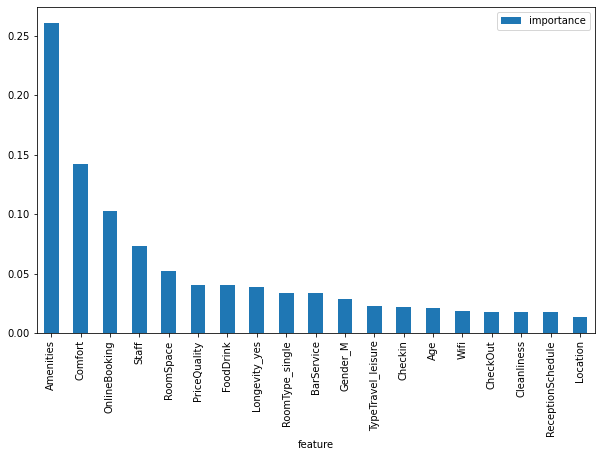

In [91]:
importances.plot.bar(figsize=(10,6))
plt.show()

From the bar plot above we can retrieve the following conclusions: 
- __Amenities, Comfort, OnlineBooking__ and __Staff__ are the __most important__ features. 
- __Age, Wifi, CheckOut__ and __Location__ are the __least important__ features. 

These results are in accordance with RFE results, where in some splits these features were considered to discard. 

After testing with different number of features, the __best results were obtained by dropping the following features__:             
   - __Age__
   - __Wifi__
   - __CheckOut__
   - __Cleanliness__
   - __Location__

In addition to the train + validation best results, in order to guarantee the best result possible for unseen data, this analysis considered the best choice of features to obtain the best kaggle result.

Therefore, the next steps present the development and validation of the final Random Forest prediction model, by selecting the optimum number features, and also by the determining the best parameters of our model using GridSearchCV.
  
#### Random Forest model with best feature selection

In [92]:
Xrf_train_dummy.drop(['Age','Wifi','CheckOut','Cleanliness', 'Location'], axis = 1, inplace = True) 
Xrf_val_dummy.drop(['Age','Wifi','CheckOut','Cleanliness', 'Location'], axis = 1, inplace = True) 

__`Step 12`__ Define Random Forest model (rf_model)


In [93]:
rfnew_model = RandomForestClassifier()

__`Step 13`__ - Define a dictionary named as __parameter_space__ and define the following options to be considered during modelling:

In [94]:
parameter_space = {
    'n_estimators': [10, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [6, 8, 10],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'min_weight_fraction_leaf': [0, 0.001, 0.0001],
    'max_features': ['sqrt', 'log2', None]
}

__`Step 14`__ - Create an instance of GridSearchCV named as __clf__ and pass as parameters the __model__ and the __parameter_space__

In [95]:
clfrf_new = GridSearchCV(rfnew_model, parameter_space)

__`Step 15`__ - Fit your Grid Search to __X_train__ and __y_train__

In [96]:
clfrf_new.fit(Xrf_train_dummy, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_weight_fraction_leaf': [0, 0.001, 0.0001],
                         'n_estimators': [10, 100]})

__`Step 16`__ - Call the attribute __best_params___ to check which is the best combination of parameters, and then create a final model with those parameters by calling the attribute __best_estimator___

In [97]:
clfrf_new.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_weight_fraction_leaf': 0.0001,
 'n_estimators': 100}

In [98]:
rfnew_model = clfrf_new.best_estimator_.fit(Xrf_train_dummy, y_train)

__`Step 17`__ Apply both train and validation sets to our random forest classifier __rf_model__

In [99]:
print('Train:', rfnew_model.score(Xrf_train_dummy, y_train))
print('Test:', rfnew_model.score(Xrf_val_dummy, y_val))

Train: 0.9555359009407414
Test: 0.9260450160771704


Again, there is some evidence of overfitting in our model, however it is about 2 %, so it is not considerable. In order to better understand the performance of the obtained Random Forest model, we are performing:   
- a stratified k-fold cross analysis, to observe if for different train and test splits, the results are more or less the same or not. 
- assess the performance with some evaluation metrics (specially f1-score)
    
Finally, we apply it to the test dataset, and submit the results into the Kaggle competition 

__`Step 18`__ - Create a loop to check the mean and the standard deviation of the different models created using the different combinations using GridSearchCV

In [100]:
# Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clfrf_new.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

# All results
means = clfrf_new.cv_results_['mean_test_score']
stds = clfrf_new.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clfrf_new.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_weight_fraction_leaf': 0.0001, 'n_estimators': 100}
------------------------------------------------------------------------------------------------------------------------
0.895 (+/-0.004) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0, 'n_estimators': 10}
0.903 (+/-0.006) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0, 'n_estimators': 100}
0.895 (+/-0.004) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0.001, 'n_estimators': 10}
0.900 (+/-0.005) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'max_featu

__`Step 19`__ K-fold Cross Validation
- Purpose is to check if, for different validation+train splits, the results are similar and thus we can consider hold-out split as representative of our dataset. 

In [103]:
kf = KFold(n_splits=10)
Xtemp = pd.get_dummies(X, drop_first = True)
avg_score(kf, rfnew_model, Xtemp.drop(['RoomType_suite','Wifi','Age','Cleanliness','CheckOut','Location'], axis = 1), y)

Train: 0.9555460263007433
Validation: 0.940192926045016

Train: 0.9539736992567182
Validation: 0.9318327974276527

Train: 0.9556889651229273
Validation: 0.9356913183279743

Train: 0.9548313321898227
Validation: 0.9356913183279743

Train: 0.9543310463121784
Validation: 0.9305466237942123

Train: 0.9558319039451115
Validation: 0.9318327974276527

Train: 0.9541166380789022
Validation: 0.932475884244373

Train: 0.9544057743157293
Validation: 0.9337194337194337

Train: 0.955334810262274
Validation: 0.9317889317889317

Train: 0.9552633459586937
Validation: 0.9337194337194337

-------------------------------
Average Train:0.9549+/-0.0007
Average Validation:0.9337+/-0.0027


- The average results with K-fold validation allow to conclude that the dataset is large enough to consider the hold-out split results

__`Step 20`__ In order to performance of our model with different metrics, first assign the predictions to y_pred.

In [104]:
y_pred_rf = rfnew_model.predict(Xrf_val_dummy)
y_pred_rf

array([0, 1, 0, ..., 1, 0, 0])

__`Step 21`__ Obtain the confusion matrix

The confusion matrix in sklearn is presented in the following format: <br>
[ [ TN  FP  ] <br>
    [ FN  TP ] ]

In [105]:
confusion_matrix(y_val, y_pred_rf)

array([[1601,   90],
       [  54, 1365]], dtype=int64)

__`Step 22`__ Get the accuracy score, balanced accuracy score, precision score, recall score and the F1 Score

$$accuracy = \frac{TP + TN}{TP + FN + TN + FP}$$

In [106]:
accuracy_score(y_val, y_pred_rf)

0.9536977491961415

$$Balanced Accuracy = \frac{\frac{TP}{TP + FN} + \frac{TN}{FP + TN}}{2}$$

In [107]:
balanced_accuracy_score(y_val, y_pred_rf)

0.9543610433547584

$$precision = \frac{TP}{TP + FP}$$

In [108]:
precision_score(y_val, y_pred_rf)

0.9381443298969072

$$recall = \frac{TP}{TP + FN}$$

In [109]:
recall_score(y_val, y_pred_rf)

0.9619450317124736

$$F1 = \frac{2 \times precision \times recall}{precision+recall}$$

In [110]:
f1_score(y_val, y_pred_rf)

0.9498956158663883

__`Step 23`__ Determine the classification report for both train a validation predicted results.

In [111]:
labels_train_rf = rfnew_model.predict(Xrf_train_dummy)
labels_val_rf = rfnew_model.predict(Xrf_val_dummy)

metrics(y_train = y_train, pred_train = labels_train_rf, y_val = y_val, pred_val = labels_val_rf)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6762
           1       0.94      0.95      0.95      5675

    accuracy                           0.95     12437
   macro avg       0.95      0.95      0.95     12437
weighted avg       0.95      0.95      0.95     12437

[[6434  328]
 [ 257 5418]]
___________________________________________________________________________________________________________
                                                   VALIDATION                                              
----------------------------------------------------------------------------------------------------------

__`Step 25`__ Test the model with unseen data - Kaggle Submission

f1-score result -> 92.8%

#### Random Forest model Results f1-score >> Train: 94.6 % | Val: 95.0 % | Test: 92.8 %

<a id="KNNClassifier"> </a>

#### <font color = '#cc9900'> 4.5 Assess using KNN Classifier </font>

[Back to Contents](#toc)

#### What is KNN Classifier?

The K-nearest neighbors algorithm (K-NN) is a non-parametric supervised learning method.

It is an example of a "lazy learner" algorithm because it does not generate a model of the data set beforehand. The only calculations it makes are when it is asked to poll the data point's neighbors. This makes k-nn very easy to implement for data mining.

#### How does the KNN Classifier work?

The K-NN working can be explained on the basis of the below algorithm:

``Step-1``: Select the number K of the neighbors, which must be pre-defined by the user <br>
``Step-2``: Calculate the distance of K number of neighbors using chosen metric distance (Euclidean, Minkowski, ...)<br>
``Step-3``: Take the K nearest neighbors as per the calculated distance<br>
``Step-4``: Among these K neighbors, count the number of the data points in each category<br>
``Step-5``: Assign the new data points to that category for which the number of the neighbor is maximum<br>
``Step-6``: Our model is ready.<br>

<img src="images/knn.png" width="500px">

#### K-Neighbors Classifier Model Function

__``KNeighborsClassifier``(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)<br>__

<font color = '#cc9900'> __n_neighbors:__ <br>

The most important step in k-Nearest Neigborhood supervised machine learning is to determine the __``optimal value of K``; that is, how many clusters your data should be divided into?__ <br> The optimal value of k reduces effect of the noise on the classification, but makes boundaries between classes less distinc. <br> __Elbow method__ helps data scientists to select the optimal number of clusters for KNN clustering. It is one of the most popular methods to determine this optimal value of K. <br>

<font color = '#cc9900'> __Weights:__ <br>
    
The basic nearest neighbors classification uses __uniform weights__: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. <br>
    __``weights{‘uniform’, ‘distance’} or callable, default=’uniform’``<br>__
    Weight function used in prediction. Possible values:<br>

   ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.<br>

   ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.<br>

<font color = '#cc9900'> __Algorithm:__ <br>
   __``algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’``<br>__
  
Algorithm used to compute the nearest neighbors:<br>

   ball tree: will use BallTree <br>

   kd_tree: will use KDTree <br>

   brute: will use a brute-force search. <br>

   auto: will attempt to decide the most appropriate algorithm based on the values passed to fit method.<br>

   Note: fitting on sparse input will override the setting of this parameter, using brute force.<br>
    
<font color = '#cc9900'> __Leaf:__ <br>  
   __``leaf_sizeint, default=30``__

Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

<font color = '#cc9900'> __Pint:__ <br>
   __``pint, default=2``__

Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

<font color = '#cc9900'> __Metric:__ <br>
__``metricstr or callable, default=’minkowski’``__

The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 

<font color = '#cc9900'> __Metric Function:__ <br>
__``metric_paramsdict, default=None``__

Additional keyword arguments for the metric function.

<font color = '#cc9900'> __Jobs:__ <br>
__``n_jobsint, default=None``__

The number of parallel jobs to run for neighbors search.







### Application of KNN Classifier model to our dataset

__`Step 1`__: Define the variables that will be used in the model

- __Initial X_train and X_val__

Different combinations of the variables identified in the feature selection as potential variables to remove were considered, being the summary of results obtained as follows:

#### Final insights from the removal of suggested variables in Feature Selection step

| Additional variables removed | f1-train | f1-validation  
| --- | --- | --- | 
| None | 0.91 | 0.87 | 
| Age | 0.93 | 0.91 |
| Age+Wifi |  0.93 | 0.91 |
| Age+Wifi+Checkout |  0.93 | 0.91 |
| Age+Wifi+Checkout+Cleanliness |  0.93 | 0.90 |
| Age+Wifi+Checkout+RoomService |  0.93 | 0.91 |
| Age+Wifi+Checkout+RoomService+Cleanliness |  0.93 | 0.91 |

- The variable that really makes the difference is the variable __Age__ 
- However, since this model works better with fewer variables (collinearity principle), it has been decided to remove them all.

In [112]:
Xknn_train_dummy = X_train_dummy.copy()
Xknn_val_dummy = X_val_dummy.copy()

Xknn_train_dummy.drop(['Age','Wifi','CheckOut','Cleanliness','ReceptionSchedule','BarService', 'Location'], axis = 1, inplace = True) 
Xknn_val_dummy.drop(['Age','Wifi','CheckOut','Cleanliness','ReceptionSchedule','BarService', 'Location'], axis = 1, inplace = True) 

__`Step 2`__ Define __KNN Classifier__ model

In [113]:
knn = KNeighborsClassifier()

__`Step 3`__ - Define a dictionary named as __parameter_space__ and define the following options to be considered during modelling:

In [114]:
i=0
parameter_space1 = {
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

__`Step 4`__ - Create an instance of GridSearchCV named as __clf1__ and pass as parameters the __knn model__ and the __parameter_space1__


In [115]:
clf1 = GridSearchCV(knn, parameter_space1)

__`Step 5`__ - Fit your Grid Search to __X_train__ and __y_train__

In [116]:
clf1.fit(Xknn_train_dummy, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

__`Step 6`__ - Call the attribute __best_params___ to check which is the best combination of parameters. Create a final model with those parameters by calling the attribute __best_estimator___

In [105]:
clf1.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [117]:
knn = clf1.best_estimator_.fit(Xknn_train_dummy, y_train)

__`Step 7`__ Apply both train and validation sets to our random forest classifier __final_model__

In [118]:
print('Train:', knn.score(Xknn_train_dummy, y_train))
print('Validation:', knn.score(Xknn_val_dummy, y_val))

Train: 0.9905121813942269
Validation: 0.9102893890675241


- There is some evidence of overfitting in our model

__`Step 8`__ - Create a loop to check the mean and the standard deviation of the different models created using the different combinations using GridSearchCV



In [119]:
# Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clf1.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

# All results
means = clf1.cv_results_['mean_test_score']
stds = clf1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))
    

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'algorithm': 'brute', 'metric': 'manhattan', 'p': 1, 'weights': 'distance'}
------------------------------------------------------------------------------------------------------------------------
0.904 (+/-0.003) for {'algorithm': 'auto', 'metric': 'euclidean', 'p': 1, 'weights': 'uniform'}
0.903 (+/-0.002) for {'algorithm': 'auto', 'metric': 'euclidean', 'p': 1, 'weights': 'distance'}
0.904 (+/-0.003) for {'algorithm': 'auto', 'metric': 'euclidean', 'p': 2, 'weights': 'uniform'}
0.903 (+/-0.002) for {'algorithm': 'auto', 'metric': 'euclidean', 'p': 2, 'weights': 'distance'}
0.907 (+/-0.003) for {'algorithm': 'auto', 'metric': 'manhattan', 'p': 1, 'weights': 'uniform'}
0.907 (+/-0.004) for {'algorithm': 'auto', 'metric': 'manhattan', 'p': 1, 'weights': 'distance'}
0.907 (+/-0.003) for {'algorithm': 'auto', 'metric': 'manhattan', 'p': 2, 'wei

In [120]:
knn = KNeighborsClassifier(n_neighbors=10,weights='distance', algorithm='auto', 
                           leaf_size=30, p=1, metric='manhattan', metric_params=None, n_jobs=None)

knn.fit(Xknn_train_dummy,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10, p=1,
                     weights='distance')

In [121]:
print('Train:', knn.score(Xknn_train_dummy, y_train))
print('Validation:', knn.score(Xknn_val_dummy, y_val))

Train: 0.9905121813942269
Validation: 0.9102893890675241


- We have clear signs of overfitting

__`Step 9`__ - Try the elbow method for K value definition


In [122]:
error_rate = []

# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i,weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 knn.fit(Xknn_train_dummy,y_train)
 pred_i = knn.predict(Xknn_val_dummy)
 error_rate.append(np.mean(pred_i != y_val))


Text(0, 0.5, 'Error Rate')

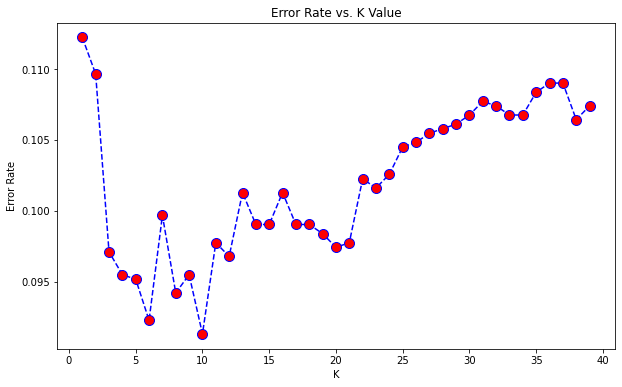

In [123]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [124]:
knn = KNeighborsClassifier(n_neighbors=6,weights='uniform', algorithm='auto', 
                           leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

knn.fit(Xknn_train_dummy,y_train)

KNeighborsClassifier(n_neighbors=6)

__`Step 10`__ K-fold Cross Validation
- Purpose is to check if, for different validation+train splits, the results are similar and thus we can consider hold-out split as representative of our dataset. 

In [126]:
kf = KFold(n_splits=10)
Xtemp = pd.get_dummies(X, drop_first = True)

avg_score(kf, knn, Xtemp.drop(['RoomType_suite','Age','Wifi','CheckOut','Cleanliness','ReceptionSchedule','BarService', 'Location'], axis = 1), y)

Train: 0.9273870783304745
Validation: 0.9170418006430868

Train: 0.9279588336192109
Validation: 0.9093247588424437

Train: 0.9284591194968553
Validation: 0.9061093247588424

Train: 0.9286020583190394
Validation: 0.9151125401929261

Train: 0.9312464265294454
Validation: 0.8926045016077171

Train: 0.9271726700971984
Validation: 0.9016077170418006

Train: 0.9273870783304745
Validation: 0.9048231511254019

Train: 0.9268205531337097
Validation: 0.9131274131274131

Train: 0.9291074108482813
Validation: 0.8925353925353925

Train: 0.9294647323661831
Validation: 0.9021879021879022

-------------------------------
Average Train:0.9284+/-0.0013
Average Validation:0.9054+/-0.0081


- The average results with K-fold validation allow to conclude that the dataset is large enough to consider the hold-out split results

__`Step 11`__ In order to performance of our model with different metrics, first assign the predictions to __y_pred_knn__.

In [127]:
y_pred_knn = knn.predict(Xknn_val_dummy)
y_pred_knn

array([0, 1, 0, ..., 1, 0, 0])

__`Step 12`__ Get the confusion_matrix, and the metrics accuracy_score, precision_score, recall_score, f1_score

In [128]:
confusion_matrix(y_val, y_pred_knn)

array([[1600,   91],
       [ 137, 1282]], dtype=int64)

In [129]:
accuracy_score(y_val, y_pred_knn)

0.9266881028938907

In [130]:
balanced_accuracy_score(y_val, y_pred_knn)

0.9248194124763651

In [131]:
precision_score(y_val, y_pred_knn)

0.9337217771303714

In [132]:
recall_score(y_val, y_pred_knn)

0.9034531360112755

In [133]:
f1_score(y_val, y_pred_knn)

0.9183381088825214

__`Step 13`__ Determine the classification report for both train a validation predicted results.

In [134]:
labels_train_knn = knn.predict(Xknn_train_dummy)
labels_val_knn = knn.predict(Xknn_val_dummy)

metrics(y_train = y_train, pred_train = labels_train_knn, y_val = y_val, pred_val = labels_val_knn)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      6762
           1       0.93      0.90      0.92      5675

    accuracy                           0.93     12437
   macro avg       0.93      0.92      0.93     12437
weighted avg       0.93      0.93      0.93     12437

[[6405  357]
 [ 554 5121]]
___________________________________________________________________________________________________________
                                                   VALIDATION                                              
----------------------------------------------------------------------------------------------------------

__`Step 14`__ Test the model with unseen data - Kaggle Submission

f1-score result -> 89.9 %

#### KNN Classifier model Results >> fi1-score - Train: 91.7 % | Val: 91.8 % | Test: 89.9 %

<a id="DTClassifier"> </a>

#### <font color = '#cc9900'> 4.6. Assess using Decision Tree Classifier </font>

[Back to Contents](#toc)

#### What is Decision Tree?
A Decision Tree (DT) is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.
<img src="images/decision_tree.png" width="900px">
The classification process is modeled with the use of a set of hierarchical decisions on the feature variables, arranged in a tree-like structure.  

The decision at a particular node of the tree, the split criterion, is typically a condition on one or more feature variables in the training data.

The goal is to identify a split criterion so that the level of “mixing” of the class variables in each branch of the tree is reduced as much as possible. Each node in the decision tree logically represents a subset of the data space defined by the combination of split criteria in the nodes above it.  

The decision tree is typically constructed as a hierarchical partitioning of the training examples, partitioning criterion in the decision tree is supervised with the class label in the training instances. 


#### Generic Decision Tree Training Algorithm
Algorithm GenericDecisionTree(Data Set: D)
<br>begin
<br>Create root node containing D;
<br>repeat
<br>Select an eligible node in the tree;
<br>Split the selected node into two or more nodes
<br>based on a pre-defined split criterion;
<br>until no more eligible nodes for split;
<br>Prune overfitting nodes from tree;
<br>Label each leaf node with its dominant class;
<br>end

#### scikit-learn Decision Tree Classifier Model Function
__DecisionTreeClassifier__(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)<br>
Parameters:<br>
`criterion`: function to measure the quality of a split. Supported criterion are: 'gini' for the Gini impurity and 'entropy' for the Shannon information gain). (default = 'gini').<br>
`splitter`: strategy used to choose the split at each node. Supported strategies are 'best', to choose the best split and 'random' to choose the best random split. (default = 'best').<br>
`max_depth`: maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.<br>
`min_samples_split`: minimum number of samples required to split an internal node. (default = 2)<br>
`min_samples_leaf`: minimum number of samples required to be at a leaf node. (default = 1) <br>
`min_weight_fraction_leaf`: minimum weighted fraction of the sum total of weights (default=0.0)<br>
`max_features`: number of features to consider when looking for the best split:
<br> 1. `int`: consider max_features features at each split.<br> 
2. `float`: `max_features` is a fraction and `int(max_features * n_features)` features are considered at each split.<br>
3. `auto`, then`max_features=sqrt(n_features)`. <br>
4. `“sqrt”`, then `max_features=sqrt(n_features)`.<br>
5. `“log2”`, then `max_features=log2(n_features)`.<br>
6. `None`, then `max_features=n_features`.<br>
`random_state`: Controls the randomness of the estimator. RandomState instance or None, default=None<br>
The features are always randomly permuted at each split, even if `splitter` is set to `"best"`. When `max_features < n_features`, the algorithm will select `max_features` at random at each split before finding the best split among them. But the best found split may vary across different runs, even if `max_features=n_features`. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, `random_state` has to be fixed to an integer.<br>
`max_leaf_nodes`: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.<br>
`min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.<br>
`class_weightdict`, list of dict or “balanced”, default=None<br>
Weights associated with classes in the form `{class_label: weight}`. If None, all classes are supposed to have weight one.<br>
`ccp_alpha`: Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. (default=0.0)<br>

__`Step 1`__ Copy train and validation sets

In [135]:
Xdt_train_dummy = X_train_dummy.copy()
Xdt_val_dummy = X_val_dummy.copy()

__`Step 2`__ Define __Decision Tree model__ (dt_model)

In [136]:
dt_model = DecisionTreeClassifier()

__`Step 3`__ Define a dictionary named as __parameter_space_dt__ and define the following options to be considered during modelling.

In [138]:
parameter_space_dt = {
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_depth': [4, 6, 10, 12, 16],
    'min_weight_fraction_leaf': [0.0, 0.0001, 0.001], 
    'max_features': [None, 'auto', 'log2', 'sqrt'],
}

__`Step 4`__ Create an instance of GridSearchCV named as __clf_dt__ and pass as __parameters__ the model and the __parameter_space_dt__

In [139]:
clf_dt = GridSearchCV(dt_model, parameter_space_dt)

__`Step 5`__ Fit Grid Search to __Xdt_train__ and __y_train__ and check which is the best combination of parameters. Create a final model with those parameters by calling the attribute best_estimator_

In [140]:
clf_dt.fit(Xdt_train_dummy, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 10, 12, 16],
                         'max_features': [None, 'auto', 'log2', 'sqrt'],
                         'min_weight_fraction_leaf': [0.0, 0.0001, 0.001],
                         'splitter': ['best', 'random']})

In [141]:
clf_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': None,
 'min_weight_fraction_leaf': 0.0001,
 'splitter': 'best'}

In [142]:
dt_model = clf_dt.best_estimator_.fit(X_train_dummy, y_train)

__`Step 6`__ Apply both train and validation sets to decision tree classifier __dt_model__

In [144]:
print('Train:', dt_model.score(Xdt_train_dummy, y_train))
print('Val:', dt_model.score(Xdt_val_dummy, y_val))

Train: 0.9596365683042535
Val: 0.9237942122186495


__`Step 7`__ Create a loop to check the mean and the standard deviation of the different models created using the different combinations using GridSearchCV

In [145]:
# Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clf_dt.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

# All results
means = clf_dt.cv_results_['mean_test_score']
stds = clf_dt.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_dt.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'criterion': 'entropy', 'max_depth': 12, 'max_features': None, 'min_weight_fraction_leaf': 0.0001, 'splitter': 'best'}
------------------------------------------------------------------------------------------------------------------------
0.864 (+/-0.006) for {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
0.837 (+/-0.009) for {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}
0.864 (+/-0.006) for {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_weight_fraction_leaf': 0.0001, 'splitter': 'best'}
0.841 (+/-0.006) for {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_weight_fraction_leaf': 0.0001, 'splitter': 'random'}
0.864 (+/-0.006) for {'criterion': 'gini', 'max_depth': 4, 'max_feat

In [172]:
dt_model = DecisionTreeClassifier(criterion= 'entropy', max_depth = 12, 
                                  max_features = None,
                                  min_weight_fraction_leaf=0.0001,
                                  splitter = 'best', random_state = 0)

dt_model.fit(X_train_dummy,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12,
                       min_weight_fraction_leaf=0.0001, random_state=0)

In [173]:
print('Train:', dt_model.score(X_train_dummy, y_train))
print('Validation:', dt_model.score(X_val_dummy, y_val))

Train: 0.9594757578194099
Validation: 0.9241157556270096


__`Step 8`__ K-fold Cross Validation

In [148]:
kf = KFold(n_splits=10)
Xtemp = pd.get_dummies(X, drop_first = True)
avg_score(kf, dt_model, Xtemp.drop('RoomType_suite', axis = 1), y)

Train: 0.9624785591766724
Validation: 0.9292604501607717

Train: 0.9576901086335049
Validation: 0.9279742765273312

Train: 0.9605488850771869
Validation: 0.9241157556270096

Train: 0.9537592910234419
Validation: 0.9356913183279743

Train: 0.9540451686678102
Validation: 0.9215434083601286

Train: 0.9609062321326473
Validation: 0.9163987138263665

Train: 0.9601200686106347
Validation: 0.9305466237942123

Train: 0.9591224183520332
Validation: 0.9234234234234234

Train: 0.9598370613878368
Validation: 0.9234234234234234

Train: 0.960265847209319
Validation: 0.9124839124839125

-------------------------------
Average Train:0.9589+/-0.0027
Average Validation:0.9245+/-0.0065


__`Step 9`__ In order to performance of our model with different metrics, first assign the predictions to y_pred_dt.

In [149]:
y_pred_dt = dt_model.predict(X_val_dummy)
y_pred_dt

array([0, 1, 0, ..., 1, 0, 0])

__`Step 10`__ Test the model with unseen data - Kaggle Submission

f1-score result -> 53.1 %

Again, just like in the previous models results, considering all features turns out not to be the best solution. The next step consists of understanding the most and least important features, and see if for a different set of features, the results can be improved.
It was performed an analysis of the model performance with the removal of the features that were in doubt, one by one, and understand which set of features achieves the best results.

- Age
- BarService
- CheckOut
- Cleanliness
- Wifi
- Location

Below it is only present the resulting best number of features and its performance analysis.

#### Decision Tree with best feature selection

In [174]:
Xdt_train_dummy.drop(['Age', 'BarService', 'CheckOut', 'Cleanliness', 'Wifi', 'Location'], axis = 1, inplace = True) 
Xdt_val_dummy.drop(['Age', 'BarService', 'CheckOut', 'Cleanliness', 'Wifi', 'Location'], axis = 1, inplace = True) 

__`Step 12`__ Define Decision Tree model (dt_model_new)

In [175]:
dt_model_new = DecisionTreeClassifier()

In [176]:
parameter_space_dt = {
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_depth': [4, 6, 10, 12, 16],
    'min_weight_fraction_leaf': [0.0, 0.0001, 0.001], 
    'max_features': [None, 'auto', 'log2', 'sqrt'],
}

__`Step 13`__ Create an instance of GridSearchCV named as __clf_dt_new__ and pass as __parameters__ the model and the __parameter_space_dt__. Check which is the best combination of parameters. Create a final model with those parameters by calling the attribute __best_estimator___

In [177]:
clf_dt_new = GridSearchCV(dt_model_new, parameter_space_dt)

In [178]:
clf_dt_new.fit(Xdt_train_dummy, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 10, 12, 16],
                         'max_features': [None, 'auto', 'log2', 'sqrt'],
                         'min_weight_fraction_leaf': [0.0, 0.0001, 0.001],
                         'splitter': ['best', 'random']})

In [179]:
clf_dt_new.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_weight_fraction_leaf': 0.0001,
 'splitter': 'best'}

__`Step 14`__ Create a loop to check the mean and the standard deviation of the different models created using the different combinations using GridSearchCV

In [180]:
# Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clf_dt_new.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

# All results
means = clf_dt_new.cv_results_['mean_test_score']
stds = clf_dt_new.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_dt_new.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_weight_fraction_leaf': 0.0001, 'splitter': 'best'}
------------------------------------------------------------------------------------------------------------------------
0.861 (+/-0.006) for {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
0.842 (+/-0.010) for {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}
0.861 (+/-0.006) for {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_weight_fraction_leaf': 0.0001, 'splitter': 'best'}
0.855 (+/-0.013) for {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_weight_fraction_leaf': 0.0001, 'splitter': 'random'}
0.861 (+/-0.006) for {'criterion': 'gini', 'max_depth': 4, 'max_feat

In [182]:
dt_model_new = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', 
                                      max_depth = 10, min_weight_fraction_leaf = 0.0001, 
                                      max_features = None, random_state = 0)

dt_model_new.fit(Xdt_train_dummy, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10,
                       min_weight_fraction_leaf=0.0001, random_state=0)

__`Step 15`__ Apply both train and validation sets to decision tree classifier dt_model_new

In [183]:
print('Train:', dt_model_new.score(Xdt_train_dummy, y_train))
print('Test:', dt_model_new.score(Xdt_val_dummy, y_val))

Train: 0.9359974270322425
Test: 0.9247588424437299


__`Step 16`__ K-fold Cross Validation

In [184]:
kf = KFold(n_splits=10)
Xtemp = pd.get_dummies(X, drop_first = True)
avg_score(kf, dt_model_new, Xtemp.drop(['RoomType_suite','Age', 'BarService', 'CheckOut', 'Cleanliness', 'Wifi', 'Location'], axis = 1), y)

Train: 0.9388936535162951
Validation: 0.9292604501607717

Train: 0.9367495711835334
Validation: 0.9221864951768489

Train: 0.9403230417381361
Validation: 0.9196141479099679

Train: 0.9354631217838765
Validation: 0.9254019292604502

Train: 0.9343196112064036
Validation: 0.9067524115755627

Train: 0.9384648370497427
Validation: 0.9118971061093247

Train: 0.9378216123499142
Validation: 0.912540192926045

Train: 0.9384692346173087
Validation: 0.9234234234234234

Train: 0.9391838776531123
Validation: 0.9234234234234234

Train: 0.9383263060101479
Validation: 0.9214929214929215

-------------------------------
Average Train:0.9378+/-0.0017
Average Validation:0.9196+/-0.0066


__`Step 17`__ In order to performance of our model with different metrics, first assign the predictions to y_pred.

In [185]:
y_pred_dt = dt_model_new.predict(Xdt_val_dummy)
y_pred_dt 

array([0, 1, 0, ..., 1, 0, 0])

__`Step 18`__ Get the confusion_matrix, and the metrics accuracy_score, precision_score, recall_score, f1_score

In [186]:
confusion_matrix(y_val, y_pred_dt)

array([[1612,   79],
       [  93, 1326]], dtype=int64)

In [187]:
balanced_accuracy_score(y_val, y_pred_dt)

0.9438714847788878

In [188]:
precision_score(y_val, y_pred_dt)

0.9437722419928826

In [189]:
recall_score(y_val, y_pred_dt)

0.9344608879492601

In [194]:
f1_score(y_val, y_pred_dt)

0.9390934844192635

__`Step 19`__ Determine the classification report for both train a validation predicted results.

In [191]:
labels_train = dt_model_new.predict(Xdt_train_dummy)
labels_val = dt_model_new.predict(Xdt_val_dummy)

metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6762
           1       0.94      0.91      0.93      5675

    accuracy                           0.93     12437
   macro avg       0.94      0.93      0.93     12437
weighted avg       0.93      0.93      0.93     12437

[[6432  330]
 [ 483 5192]]
___________________________________________________________________________________________________________
                                                   VALIDATION                                              
----------------------------------------------------------------------------------------------------------

__`Step 19`__ Test the model with unseen data - Kaggle Submission

f1-score result -> 91.3 %

#### Decision Tree Classifier model Results >> fi1-score - Train: 92.7 % | Val: 93.9 % | Test: 91.3 %

<a id="MLPClassifier"> </a>

#### <font color = '#cc9900'> 4.7. Assess using Neural Network (MLP) Classifier </font>

[Back to Contents](#toc)

In [195]:
def compare_models(X, y, model):
    # apply StratifiedK-Fold
    skf = StratifiedKFold(n_splits = 5)
    score_train = []
    score_val = []
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # This time we are going to use validation to check overfitting 
        # so we need also to make all the needed changes in the validation

        # Create dummies and remove one of the variables (to avoid multicollinearity)
        X_train_dummies = pd.get_dummies(X_train, columns=['Longevity', 'TypeTravel', 'RoomType', 'Gender'], drop_first=True)
        X_val_dummies = pd.get_dummies(X_val, columns=['Longevity', 'TypeTravel', 'RoomType', 'Gender'], drop_first=True)
        
        # Data Scaling
        # Apply MinMaxScaler
        scaler = MinMaxScaler().fit(X_train_dummies)
        X_train_scaled = scaler.transform(X_train_dummies) 
        X_val_scaled = scaler.transform(X_val_dummies) # Scaling with 'scaler' from train data

        # Apply model
        model.fit(X_train_scaled, y_train)
        predictions_train = model.predict(X_train_scaled)
        predictions_val = model.predict(X_val_scaled)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return str(avg_train) + '+/-' + str(std_train),str(avg_val) + '+/-' + str(std_val)

In [126]:
#Grid Search
droplist = [ 'Age']
X_nn = X.drop(columns=droplist)

y_nn = df['Churn']

model_nn = MLPClassifier()

parameter_space_nn = {
    'hidden_layer_sizes': [30,35,40,100,125,150],
    'activation': [ 'tanh','logistic'],
    'solver': [ 'lbfgs','sgd'],
    'learning_rate_init': [0.0001,0.0003,0.0005],
    'learning_rate':[ 'constant','adaptive']
    
}

clf = GridSearchCV(model_nn, parameter_space_nn)

X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_nn, y_nn, test_size = 0.2, random_state = 150, shuffle = True, stratify = y)


# Create dummies and remove one of the variables (to avoid multicollinearity)
X_train_dummies_nn = pd.get_dummies(X_train_nn, columns=['Longevity', 'TypeTravel', 'RoomType', 'Gender'], drop_first=True)
X_val_dummies_nn = pd.get_dummies(X_val_nn, columns=['Longevity', 'TypeTravel', 'RoomType', 'Gender'], drop_first=True)

# Data Scaling
# Apply MinMaxScaler
scaler_nn = MinMaxScaler().fit(X_train_dummies_nn)
X_train_scaled_nn = scaler_nn.transform(X_train_dummies_nn) 
X_val_scaled_nn = scaler_nn.transform(X_val_dummies_nn) # Scaling with 'scaler' from train data


clf.fit(X_train_scaled_nn, y_train_nn)

# Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clf.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': 30, 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'lbfgs'}
------------------------------------------------------------------------------------------------------------------------
0.936 (+/-0.005) for {'activation': 'tanh', 'hidden_layer_sizes': 30, 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'lbfgs'}
0.778 (+/-0.014) for {'activation': 'tanh', 'hidden_layer_sizes': 30, 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'sgd'}
0.929 (+/-0.005) for {'activation': 'tanh', 'hidden_layer_sizes': 30, 'learning_rate': 'constant', 'learning_rate_init': 0.0003, 'solver': 'lbfgs'}
0.821 (+/-0.009) for {'activation': 'tanh', 'hidden_layer_sizes': 30, 'learning_rate': 'constant', 'learning_rate_init': 0.0003, 'solver': 'sgd'}
0.934 (+/-0.005) fo

In [199]:
# List of features to drop

droplist = ['Age'] #, 'Location','Wifi','CheckOut','Cleanliness','BarService'
X_nn = X.drop(columns=droplist)

y_nn = df['Churn']

# Model to aplly
model_nn = MLPClassifier(activation= 'tanh', hidden_layer_sizes= 125, learning_rate_init= 0.0003, solver= 'lbfgs') #porque é variavel categorica se fosse variavel continua era MLPRegressor
#model = MLPClassifier()

# Model evaluation
df_evaluation = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['Raw'])
compare_models(X_nn, y_nn, model_nn)




('0.95+/-0.0', '0.926+/-0.0')

In [201]:
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_nn, y_nn, test_size = 0.2, random_state = 150, shuffle = True, stratify = y)


# Create dummies and remove one of the variables (to avoid multicollinearity)
X_train_dummies_nn = pd.get_dummies(X_train_nn, columns=['Longevity', 'TypeTravel', 'RoomType', 'Gender'], drop_first=True)
X_val_dummies_nn = pd.get_dummies(X_val_nn, columns=['Longevity', 'TypeTravel', 'RoomType', 'Gender'], drop_first=True)

# Data Scaling
# Apply MinMaxScaler
scaler_nn = MinMaxScaler().fit(X_train_dummies_nn)
X_train_scaled_nn = scaler_nn.transform(X_train_dummies_nn) 
X_val_scaled_nn = scaler_nn.transform(X_val_dummies_nn) # Scaling with 'scaler' from train data

labels_train_nn = model_nn.predict(X_train_scaled_nn)
labels_val_nn = model_nn.predict(X_val_scaled_nn)

metrics(y_train = y_train_nn, pred_train = labels_train_nn, y_val = y_val_nn, pred_val = labels_val_nn)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6762
           1       0.94      0.95      0.95      5675

    accuracy                           0.95     12437
   macro avg       0.95      0.95      0.95     12437
weighted avg       0.95      0.95      0.95     12437

[[6437  325]
 [ 284 5391]]
___________________________________________________________________________________________________________
                                                   VALIDATION                                              
----------------------------------------------------------------------------------------------------------

#### Test the model with unseen data - Kaggle Submission

f1-score result -> 93.5 %

#### MLP Classifier model Results >> fi1-score - Train: 94.9 % | Val: 92.6 % | Test: 93.5 %

<a id="GBClassifier"> </a>

#### <font color = '#cc9900'> 4.8. Assess using Gradient Boosting Classifier </font>

[Back to Contents](#toc)

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Gradient boosting models are becoming popular because of their effectiveness at classifying complex datasets

`loss`- The loss function to be optimized.<br>
`learning_ratefloat` - Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.<br>
`n_estimators` - The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.<br>
`max_depth` - The maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.<br>
`criterion` - The function to measure the quality of a split.

In [228]:
# List of features to drop

droplist = ['Age']
X_gbc = X.drop(columns=droplist)

y_gbc = df['Churn']

__`Step 1`__ Run a GridSearchCV to determine the best parameters for our model. 

Both parameter intervals and features considered here, were a result of different test and trials performed.

In [244]:
#Grid Search

model_gbc= GradientBoostingClassifier()

parameter_space_gbc = {
    'loss':[ 'log_loss', 'deviance', 'exponential'],
    'learning_rate': [0.1,0.25,0.5,1,2],
    'n_estimators':[10,50, 100, 200,500,1000],
    'max_depth':[2,3,4,5],
    'criterion':['friedman_mse','mse']
    
}

clf = GridSearchCV(model_gbc, parameter_space_gbc)

X_train_gbc, X_val_gbc, y_train_gbc, y_val_gbc = train_test_split(X_gbc, y_gbc, test_size = 0.2, random_state = 150, shuffle = True, stratify = y)


# Create dummies and remove one of the variables (to avoid multicollinearity)
X_train_dummies_gbc = pd.get_dummies(X_train_gbc, columns=['Longevity', 'TypeTravel', 'RoomType', 'Gender'], drop_first=True)
X_val_dummies_gbc = pd.get_dummies(X_val_gbc, columns=['Longevity', 'TypeTravel', 'RoomType', 'Gender'], drop_first=True)

# Data Scaling
# Apply MinMaxScaler
scaler_gbc = MinMaxScaler().fit(X_train_dummies_gbc)
X_train_scaled_gbc = scaler_gbc.transform(X_train_dummies_gbc) 
X_val_scaled_gbc = scaler_gbc.transform(X_val_dummies_gbc) # Scaling with 'scaler' from train data


clf.fit(X_train_scaled_gbc, y_train_gbc)

# Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clf.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

KeyboardInterrupt: 

__`Step 2`__ Evaulate the model performance with Classification Report

In [229]:
#Define model to use
model_gbc= GradientBoostingClassifier(loss='deviance' , learning_rate=0.5 , n_estimators=100 , max_depth=4)

model_gbc.fit(X_train_scaled_gbc,y_train_gbc)

labels_train_gbc = model_gbc.predict(X_train_scaled_gbc)
labels_val_gbc = model_gbc.predict(X_val_scaled_gbc)

metrics(y_train = y_train_gbc, pred_train = labels_train_gbc, y_val = y_val_gbc, pred_val = labels_val_gbc)


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6762
           1       0.97      0.98      0.98      5675

    accuracy                           0.98     12437
   macro avg       0.98      0.98      0.98     12437
weighted avg       0.98      0.98      0.98     12437

[[6606  156]
 [ 100 5575]]
___________________________________________________________________________________________________________
                                                   VALIDATION                                              
----------------------------------------------------------------------------------------------------------

__`Step 3`__ Test the model with unseen data - Kaggle Submission

f1-score result -> 93.9 %

#### Gradient Boosting Classifier model Results >> fi1-score - Train: 97.7 % | Val: 93.6 % | Test: 93.9 %

<a id="Comparison"> </a>

#### <font color = '#cc9900'> 4.9. Conclusions </font>

[Back to Contents](#toc)

In this section, a __comparison__ between all the developed models is performed. It is based on the __f1-score__ obtained for __train, validation, and also test (with the kaggle submission result)__. 

In [208]:
df_compare = pd.DataFrame(columns = ['Train','Validation', 'Test (Kaggle submission)'], index = ['Logistic Regression','Random Forest','KNN', 'Decision Tree', 'Neural Network','Gradient Boosting Descent'])
f1_LR = [0.821, 0.818, 0.823]
f1_RF = [0.946, 0.950, 0.928]
f1_KNN = [0.917, 0.918, 0.899]
f1_DT = [0.927, 0.939, 0.913]
f1_NN = [0.949,0.926,0.935]
f1_GBC=[0.977,0.936,0.939]
df_compare.loc['Logistic Regression'] = f1_LR
df_compare.loc['Random Forest'] = f1_RF
df_compare.loc['KNN'] = f1_KNN
df_compare.loc['Decision Tree'] = f1_DT
df_compare.loc['Neural Network'] = f1_NN
df_compare.loc['Gradient Boosting Descent'] = f1_GBC

df_compare

,Train,Validation,Test (Kaggle submission)
Logistic Regression,0.821,0.818,0.823
Random Forest,0.946,0.95,0.928
KNN,0.917,0.918,0.899
Decision Tree,0.927,0.939,0.913
Neural Network,0.949,0.926,0.935
Gradient Boosting Descent,0.977,0.936,0.939


After optimizing all of the 6 prediction models, the f1-score results above represent the best model performances achieved. As shown in the table, the best model decision is mostly between NN MLP Classifier and Gradient Boosting Classifier, with very similar results, specially when applied to unseen data (test results). 

Therefore, using as a decision factor the best test results, the chosen prediction model was - __Gradient Boosting Classifier__

In the next chapter is present the dataset and model preparation, as well as creation of the prediction csv file.

# 5. Predictions <a class="anchor" id="pred"></a>
[Back to Contents](#toc)

#### Create final model

__`Step 1`__ Create the final model and train it with the whole dataset.

In [237]:
#Treinar o modelo com todo o dataset
# Create dummies and remove one of the variables (to avoid multicollinearity)
X_total_dummies_gbc = pd.get_dummies(X_gbc, drop_first=True)
X_total_dummies_gbc.drop(['RoomType_suite'], axis = 1,inplace = True) 

# Apply model
model_gbc.fit(X_total_dummies_gbc, y_gbc)


GradientBoostingClassifier(learning_rate=0.5, max_depth=4)

__`Step 2`__ Apply the final created model to get the predictions of the test dataset.

In [238]:
Test = pd.read_csv('test.csv')

In [239]:
Test.set_index('Cust_ID', inplace = True)

In [240]:
Test['Age'] = date.today().year - Test['Year_Birth']
Test['Gender'] = np.where(Test['Name'].str[:3] == 'Mr.','M','F')

Test.drop(['Year_Birth','Name','Age','RewardPoints'], axis = 1, inplace = True) 

Test_dummy = pd.get_dummies(Test, drop_first = True)
Test_dummy.drop(['RoomType_suite'], axis = 1,inplace = True) 

__`Step 3`__ Get the final predictions made by the final model. Create a dataframe with the needed columns for your final delivery: 'ID' that will contain the ID of the customer and the 'Answer', the predicted value of churn for each customer.

In [241]:
# Get predictions
predictions = model_gbc.predict(Test_dummy)
predictions

array([1, 1, 0, ..., 1, 1, 0])

In [242]:
# Save the final predictions
customer_index = Test.index.T
answer = pd.DataFrame([customer_index, predictions]).T
answer.columns = ['Cust_ID','Churn']
answer

,Cust_ID,Churn
0,30000,1
1,30001,1
2,30002,0
3,30003,1
4,30004,0
...,...,...
5190,35190,1
5191,35191,0
5192,35192,1
5193,35193,1


__`Step 4`__ Save that dataframe into a csv file named as 'best_answer.csv'.

In [243]:
answer.to_csv('best_answer.csv', index = None)